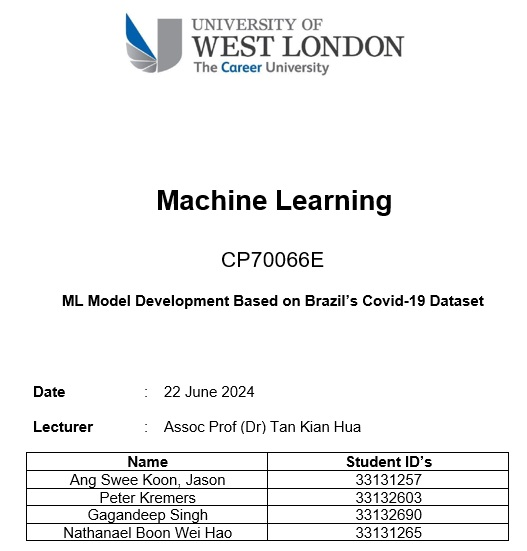

---
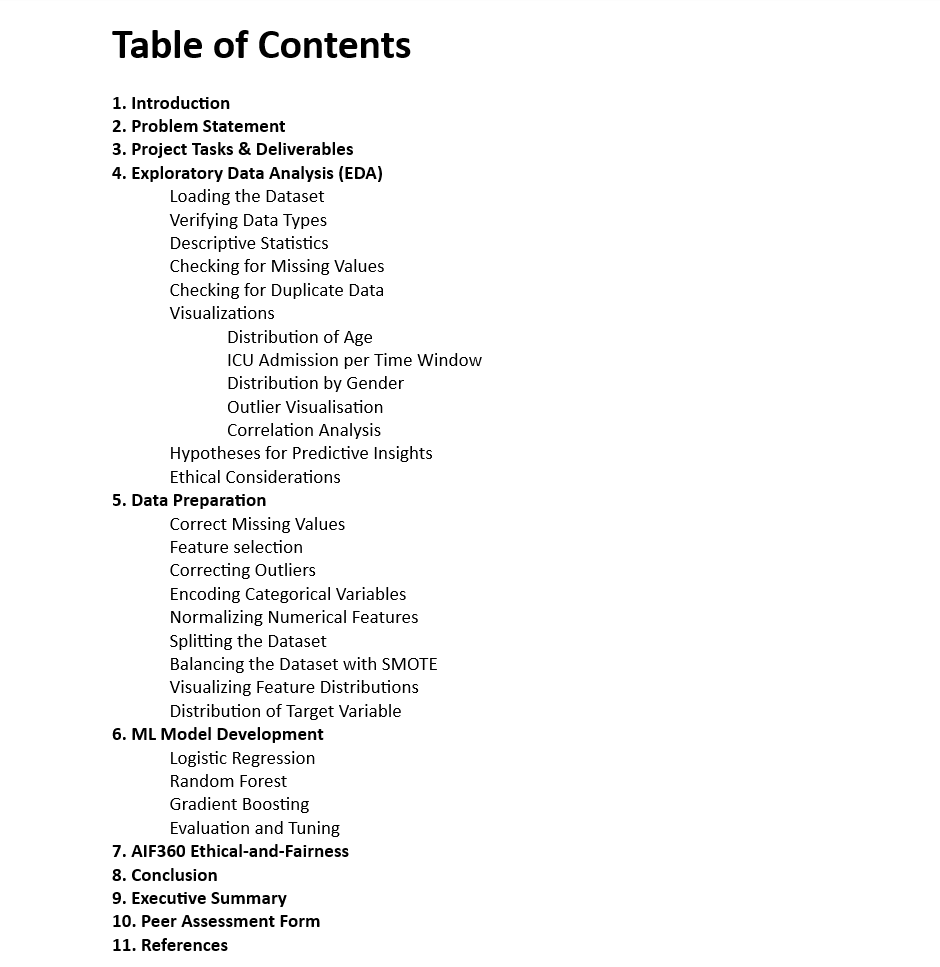

---
#**1. Introduction**
Since its emergence in 2019, the COVID-19 pandemic has been a disruptive and pervasive phenomenon that had a major impact on many countries around the world. Brazil suffered some of the worst consequences of the pandemic. According to the Johns Hopkins Coronavirus Resource Centre, as of 26 May 2021, Brazil reported more than 16 million confirmed cases and 454,429 deaths (Johns Hopkins University, 2021). The COVID-19 pandemic rapidly overwhelmed Brazil's healthcare system, creating a critical need for innovative solutions to manage the high demand for resources with limited capacity.

Sírio Libanês, a prestigious healthcare provider in Brazil, has formed a team of data scientists to address the situation by utilising Machine Learning (ML) to create a model that can accurately predict the probability of a confirmed COVID-19 patient needing ICU admission. This model aims to optimize resource allocation and improve patient outcomes by facilitating proactive and well-informed decision-making in the healthcare system.

The following sections of this report will detail the methodology employed in the development of the ML model, encompassing stages such as Exploratory Data Analysis (EDA), Data Preparation, Model Training, and Evaluation. Moreover, the ethical considerations pertinent to the use of predictive analytics in healthcare will be thoroughly addressed, ensuring that the model is both effective and fair​.





---
#**2. Problem Statement**

The COVID-19 pandemic exposed a critical gap in healthcare: the lack of a predicative model to efficiently identify patients most likely to need intensive care.
With the healthcare system under immense pressure, **the goal is to create and test a reliable machine learning model that can forecast the probability of ICU admission for COVID-19 patients.** By improving predictive capabilities, this model aims to assist healthcare professionals in making timely and informed decisions, ultimately improving patient outcomes, optimization of ICU resource allocation, and reducing the pressure on critical care resources.
Building a fair and unbiased model is essential.

The Sírio Libanês team has published a comprehensive dataset consisting of anonymized clinical information of COVID-19 patients, including the target variable that signals the requirement for ICU admission. By sharing this dataset on the Kaggle platform, they invite the global community to contribute their expertise and innovative insights to enhance patient care during the ongoing pandemic (Hospital Sírio-Libanês, 2020).
Any dataset used in this project must adhere to health-ethical standards.

---
#**3. Project Tasks & Deliverables**

The team is tasked with performing a full lifecycle ML model development, following the objectives of the dataset. This involves several key stages.

1.   **Exploratory Data Analysis (EDA):** Initially, the team will undertake EDA to establish hypotheses regarding the predictive insights expected from the dataset. It is essential to consider the ethical dimensions of data analysis during this phase to ensure responsible and unbiased findings.

2.   **Data Preparation for ML:** Following the EDA, the team will prepare the data for machine learning, informed by the insights gained from the initial analysis. This stage is critical as it ensures that the data is clean, well-structured, and suitable for the ML algorithms to be employed.

3.   **ML Model Development:** The next step is the development of the ML model. The team is required to evaluate at least three machine learning algorithms that have been covered in this module. This evaluation should include a thorough assessment of associated issues such as hyperparameters tuning, performance metrics, and model complexity, specifically addressing concerns of underfitting and overfitting.

4.   **AIF360 Ethical-and-Fairness:** An integral part of the project is to ensure the ethical and fair use of the ML model. The team will utilize the AIF360 toolkit to evaluate and ensure the model's fairness. This involves measuring bias with metrics such as disparate impact, equal opportunity, and disparate mistreatment. The team will need to pre-process the data to reduce bias, employing techniques like data reweighting, oversampling underrepresented groups, and generating synthetic data to balance the dataset. Additionally, post-processing adjustments or re-ranking model predictions will be essential to improve fairness while maintaining overall model performance. Evaluating the model's fairness by observing how various bias mitigation techniques affect different fairness metrics and using AIF360's bias mitigation algorithms during model training to actively reduce bias in predictions is crucial.

---
# **4. Exploratory Data Analysis (EDA)**

To develop a thorough understanding of the dataset and to get it ready for further modeling, an extensive Exploratory Data Analysis (EDA) was performed. This process involved several key steps, including data loading, handling missing values, verifying data types, generating descriptive statistics, visualizing key variables, and performing a correlation analysis. Each of these steps is detailed below.

**Observations are added at the end of each section.**



---
## **Loading the Dataset**
The analysis starts by importing the necessary libraries. Then, the dataset is retrieved from the specified URL using the pandas library. This dataset provides detailed information about COVID-19 patients and their likelihood of needing ICU admission. By displaying the initial few rows of the dataset, a preliminary understanding of its structure and content was achieved. Additionally, the column names were listed to become familiar with the available features.

In [ ]:
# Importing required modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Loading the dataset
file_path = 'https://raw.githubusercontent.com/Peterkr-SOA/CP70066E/main/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx'
data = pd.read_excel(file_path, engine='openpyxl')

---
## **Verifying Data Types**
Ensuring that each column in the dataset has the appropriate data type is crucial, as this affects how the data can be analysed and visualized. The data types of all columns were printed to verify that numeric variables were correctly identified as numerical data types (e.g., float64 or int64), and categorical variables were correctly identified as object data types. This step helps to identify any discrepancies or misclassifications in the data types.

In [ ]:
# Display the first few rows and the columns of the dataset
print("First few rows of the dataset:")
print(data.head())
print("\nColumn names:")
print(data.columns)

First few rows of the dataset:
   PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                         0            1          60th       0   
1                         0            1          60th       0   
2                         0            1          60th       0   
3                         0            1          60th       0   
4                         0            1          60th       0   

   DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  ...  \
0                 0.0                 1.0                 1.0  ...   
1                 0.0                 1.0

In [ ]:
# Verify data types
print("\nData Types:")
print(data.dtypes)


Data Types:
PATIENT_VISIT_IDENTIFIER        int64
AGE_ABOVE65                     int64
AGE_PERCENTIL                  object
GENDER                          int64
DISEASE GROUPING 1            float64
                               ...   
RESPIRATORY_RATE_DIFF_REL     float64
TEMPERATURE_DIFF_REL          float64
OXYGEN_SATURATION_DIFF_REL    float64
WINDOW                         object
ICU                             int64
Length: 231, dtype: object


**Observations:** The dataset consists of a total of 231 columns: 225 columns with a float64 type, 4 integer columns, and 2 object type columns.

The columns consist of the following information:
* Patient demographic information (3 features)
* Patient previous grouped diseases (9 features)
* Vital signs (6 features)
* Blood and urine test results (36 features)
* ICU admission details (2 features)


---
## **Descriptive Statistics**
Descriptive statistics offered a thorough overview of the dataset by summarizing the central tendency, dispersion, and distribution shape for each variable. Using the describe method, summary statistics were generated for both numerical and categorical variables. This included measures such as mean, median, standard deviation, and quartiles for numerical variables, as well as counts and unique values for categorical variables. These statistics facilitated understanding the overall distribution and variability of the data.

In [ ]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe(include='all'))


Descriptive Statistics:
        PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL       GENDER  \
count                1925.000000  1925.000000          1925  1925.000000   
unique                       NaN          NaN            10          NaN   
top                          NaN          NaN          20th          NaN   
freq                         NaN          NaN           215          NaN   
mean                  192.000000     0.467532           NaN     0.368831   
std                   111.168431     0.499074           NaN     0.482613   
min                     0.000000     0.000000           NaN     0.000000   
25%                    96.000000     0.000000           NaN     0.000000   
50%                   192.000000     0.000000           NaN     0.000000   
75%                   288.000000     1.000000           NaN     1.000000   
max                   384.000000     1.000000           NaN     1.000000   

        DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPI

In [ ]:
#total number of unique patients
print(f"The total number of patients from the dataset is: {data['PATIENT_VISIT_IDENTIFIER'].max()+1}.")

The total number of patients from the dataset is: 385.


**Obeservations on the dataset:**
Upon reviewing the entire data set, it appears that the data has been normalized already, as the values fall within the range of -1 to 1, with the exception of the patient identifier and any categorical attributes.

There are five rows for each patient. Multiple entries represent different stages of the patient since its admission into the hospital. Additionally, the ‘Window’ column corresponds to the time period following hospital admission.

While there are 1925 rows in the dataset, based on the PATIENT_VISIT_IDENTIFIER column, there are only 385 unique patients.



---
## **Checking for Missing Values**
Missing values, a frequent issue in real-world datasets, can significantly affect analysis if not properly handled. In this step, we identify columns with missing values in the dataset.

Missing values in dataset =  223863 



<Axes: >

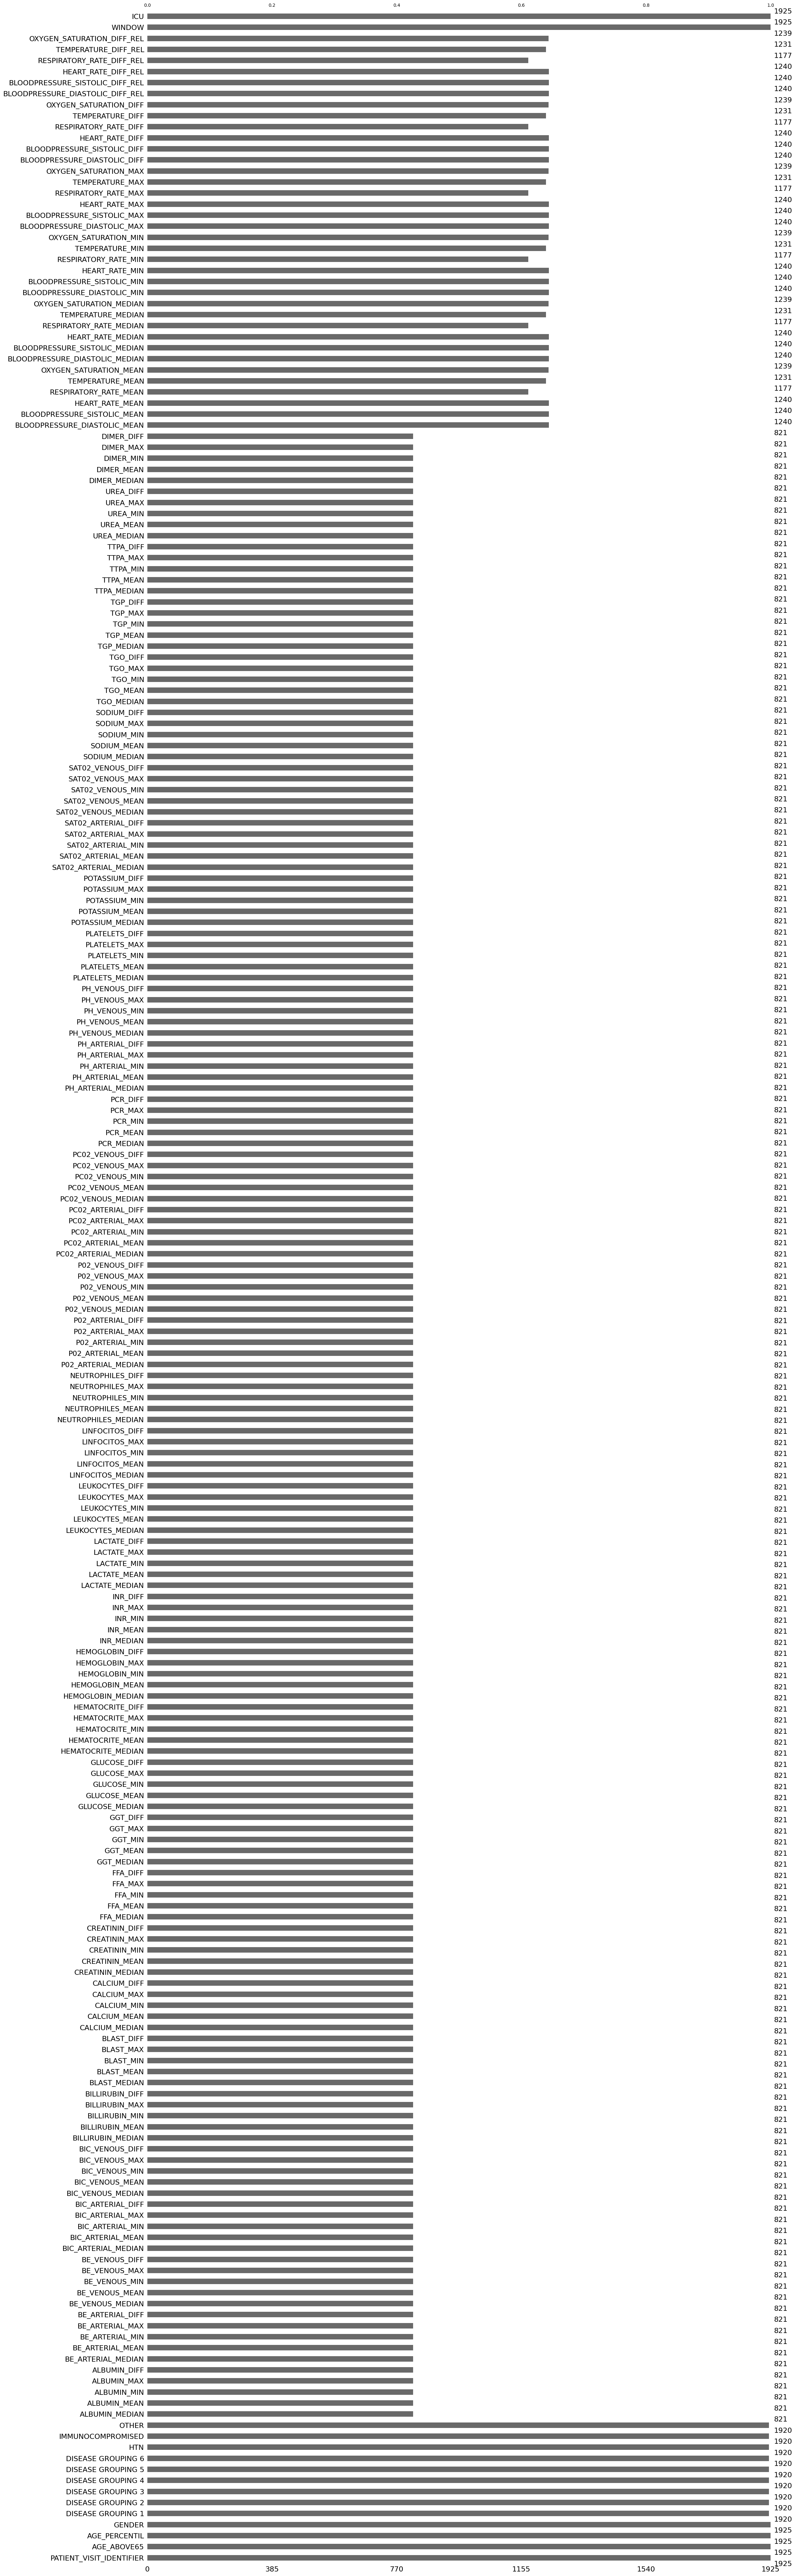

In [ ]:
# Checking for missing values
print('Missing values in dataset = ',data.isnull().sum().sum(),'\n')

# Load missing data visualization library
import missingno as msno
msno.bar(data)

*Diagram 1: Visualises missing values as a bar chart*


In [ ]:
# List of specified categorical columns
categorical_columns = [
    'AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER', 'DISEASE GROUPING 1',
    'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 'DISEASE GROUPING 4',
    'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN', 'IMMUNOCOMPROMISED',
    'OTHER', 'WINDOW', 'ICU'
]

# Print categorical columns
print(f"Categorical columns: {categorical_columns}")

# Check for missing values in the specified categorical columns
missing_values = {col: data[col].isnull().sum() for col in categorical_columns}

# Print the number of missing values for each specified categorical column
for col, missing in missing_values.items():
    print(f"The number of missing values in column '{col}' is: {missing}")

Categorical columns: ['AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER', 'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN', 'IMMUNOCOMPROMISED', 'OTHER', 'WINDOW', 'ICU']
The number of missing values in column 'AGE_ABOVE65' is: 0
The number of missing values in column 'AGE_PERCENTIL' is: 0
The number of missing values in column 'GENDER' is: 0
The number of missing values in column 'DISEASE GROUPING 1' is: 5
The number of missing values in column 'DISEASE GROUPING 2' is: 5
The number of missing values in column 'DISEASE GROUPING 3' is: 5
The number of missing values in column 'DISEASE GROUPING 4' is: 5
The number of missing values in column 'DISEASE GROUPING 5' is: 5
The number of missing values in column 'DISEASE GROUPING 6' is: 5
The number of missing values in column 'HTN' is: 5
The number of missing values in column 'IMMUNOCOMPROMISED' is: 5
The number of missing values in column 'OTHER' is: 5
The number 

**Observations on missing data:**  Significant portions of patient diagnostic data are incomplete. Eliminating the columns isn’t feasible as it would result in the loss of substantial data. Diagram 1 clearly indicates that approximately half of the numerical data is characterized by missing values. <BR>

According to the information provided by the data publishers, patient vital signs are recorded at varying intervals and frequencies. This implies that in instances where diagnostic data is absent, it can be reasonably inferred that there were no significant fluctuations in the vital signs during the periods without recorded values.

Upon reviewing the dataset, it was observed that there is no data available for Patient 199. Consequently, any entries associated with Patient 199 will be removed from the analysis to ensure data integrity and accuracy. This exclusion is necessary to maintain the consistency and reliability of our dataset for further processing and analysis.

---
## **Checking for Duplicate Data**
The code checks for and removes duplicate rows in the dataset using data.drop_duplicates(), ensuring that each row in the dataset represents unique information.

In [ ]:
#Verifying data set for duplicate rows
print(f'Original data set shape (rows, columns) {data.shape}')
data.drop_duplicates()
print(f'Data set shape after removing duplicates (rows, columns) {data.shape}')


Original data set shape (rows, columns) (1925, 231)
Data set shape after removing duplicates (rows, columns) (1925, 231)


**Observations on duplicate data:** The shape of the original dataset was found to be 1925 rows and 231 columns, and this shape remained unchanged after removing duplicates, indicating that there were no duplicate rows in the dataset. This finding is important as duplicates can skew the analysis and the model's understanding of the data.

---
## **Visualizations**
Visualizations are a powerful tool for exploring and understanding the data. Several types of plots were created to visualize the distribution of key variables. For instance, a histogram was used to visualize the distribution of the AGE_ABOVE65 variable, which indicates whether a patient is above 65 years old, providing insight into the proportion of patients in this age group. A count plot for the GENDER variable visualized the distribution of male and female patients. Additionally, box plots were used to identify outliers in continuous variables such as HEART_RATE_MEAN, BLOOD_PRESSURE_SISTOLIC_MEAN, and BLOOD_PRESSURE_DIASTOLIC_MEAN. Box plots are especially helpful for identifying outliers and comprehending the data spread.

---
### **Distribution of Age**

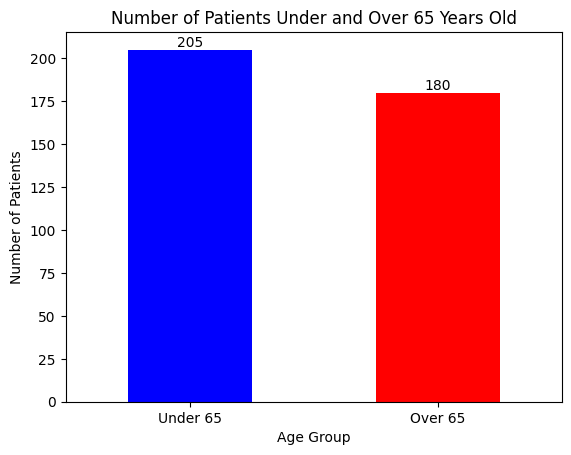

In [ ]:
# Grouping the data by AGE_ABOVE65 and counting the unique patient IDs
age_groups = data.groupby('AGE_ABOVE65')['PATIENT_VISIT_IDENTIFIER'].nunique()

# Creating a bar chart
age_groups.plot(kind='bar', color=['blue', 'red'])
plt.title('Number of Patients Under and Over 65 Years Old')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.xticks([0, 1], ['Under 65', 'Over 65'], rotation=0)
for i, value in enumerate(age_groups):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

*Diagram 2: Distribution of patients under and over 65*


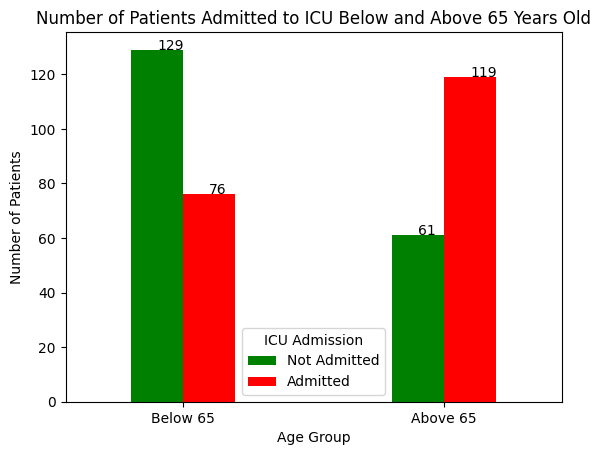

In [ ]:
# Filter for unique patients while keeping the rows where the WINDOW column has a value of ABOVE_12
unique_above_12_patients_data = data[data['WINDOW'] == 'ABOVE_12'].drop_duplicates(subset='PATIENT_VISIT_IDENTIFIER')

# Grouping the unique patient data by AGE_ABOVE65 and ICU, and counting the unique patient IDs
age_icu_groups = unique_above_12_patients_data.groupby(['AGE_ABOVE65', 'ICU'])['PATIENT_VISIT_IDENTIFIER'].nunique().unstack()

# Creating a grouped bar chart with annotations
ax = age_icu_groups.plot(kind='bar', color=['green', 'red'], width=0.4)
plt.title('Number of Patients Admitted to ICU Below and Above 65 Years Old')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.xticks([0, 1], ['Below 65', 'Above 65'], rotation=0)
plt.legend(title='ICU Admission', labels=['Not Admitted', 'Admitted'])

# Adding annotations to the bar chart
for i in ax.patches:
    ax.text(i.get_x() + 0.1, i.get_height() + 0.1, str(int(i.get_height())), color='black')

plt.show()

*Diagram 3: Number of patients admitted to ICU by age group*


**Observations from Distributions of Age:** Based on the provided histogram for the AGE_ABOVE65 variable, the following observations can be made:

1.   **Balanced Distribution:** The histogram in diagram 2 shows two bars, representing patients aged 65 and below and patients aged above 65. The heights of the bars are relatively similar, indicating a fairly balanced distribution between the two age groups.

2.   **Count of Patients:** The bar for patients aged 65 and below has a slightly higher count, with over 205 patients. The bar for patients aged above 65 has fewer patients: 180. This suggests that there are marginally more younger patients in the dataset, but the difference is not substantial.

3.   **Implications for Analysis:** This balanced age distribution is advantageous for predictive modelling as it ensures that the model can learn from both younger and older patient groups without being biased towards one group. It allows for a comprehensive analysis of how age impacts ICU admissions for COVID-19 patients.

4.  **ICU Admission:** Diagram 3 shows that while there are less patients above 65 years old in the dataset, they represent the largest group of patients admitted to the ICU. This aligns with our hypothesis that older patients have a higher change of ending up on the ICU. <BR>
Out of the total 385 patients, 195 ended up in the ICU.

---
### **ICU Admission per Time Window**

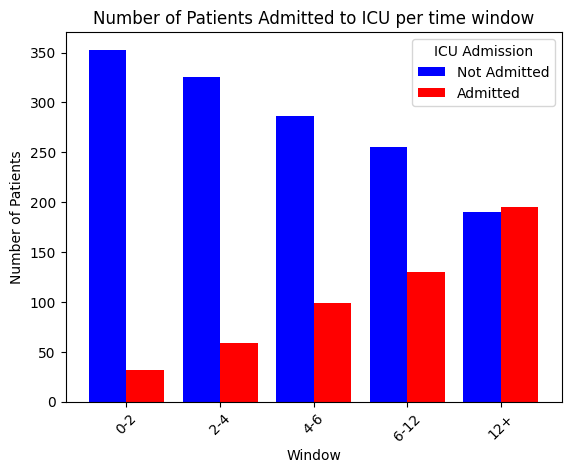

In [ ]:
# Group the data by Window and ICU, and count the unique patient IDs
window_icu_groups = data.groupby(['WINDOW', 'ICU'])['PATIENT_VISIT_IDENTIFIER'].nunique().unstack()

# Create a bar chart with stacked bars
window_icu_groups.plot(kind='bar', stacked=False, color=['blue', 'red'], width=.8)
plt.title('Number of Patients Admitted to ICU per time window')
plt.xticks(range(len(["0-2","2-4","4-6","6-12","12+"])), ["0-2","2-4","4-6","6-12","12+"], rotation=45) #This line is changed
plt.xlabel('Window')
plt.ylabel('Number of Patients')
plt.legend(title='ICU Admission', labels=['Not Admitted', 'Admitted'])
plt.show()


*Diagram 4: ICU admissions per time window*


**Observations from the ICU Admissions per Time Window:**
There is a clear positive correlation between the Window and ICU Admission.  The probability of patients being transferred to the ICU increases with the length of their hospitalization. Consequently, data collected during later windows tend to be more indicative of the need for intensive care.

---
### **Distribution by Gender**

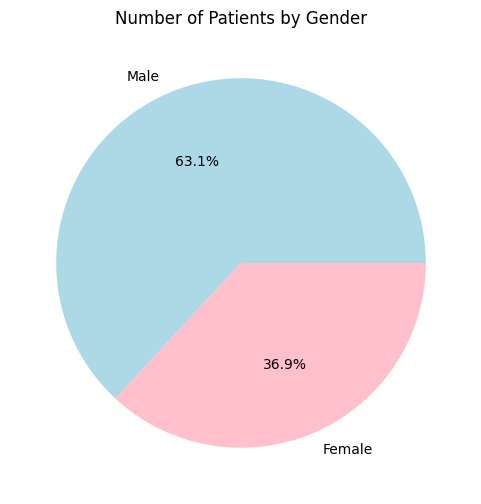

In [ ]:
# Grouping the data by GENDER_LABEL and counting the unique patient IDs
gender_groups = data.groupby('GENDER')['PATIENT_VISIT_IDENTIFIER'].nunique()

# Creating a pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_groups, labels=['Male', 'Female'], autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Number of Patients by Gender')
plt.show()

*Diagram 5: Gender distribution in dataset*


**Observations from the Distribution of Gender:** Based on the provided pie chart for the GENDER variable, the following observations can be made:

1.   **Gender Distribution:** The dataset contains more male patients than female patients. Specifically, the count of male patients is approximately 243, whereas the count of female patients is around 142.

2.   **Proportional Analysis:** This indicates a gender imbalance in the dataset, with males constituting a larger portion of the patient population. Approximately 63% of the patients are male, while 36% are female.

3.   **Potential Implications:** The gender imbalance should be taken into account when developing predictive models to ensure that the models do not inadvertently favor one gender over the other. It is important to ensure that the predictive performance is equitable across genders.

4.   **Clinical Relevance:** From a clinical perspective, the higher number of male patients may reflect known trends in COVID-19 infection rates and severity, as some studies suggest that males are more likely to experience severe outcomes from COVID-19.

---
### **Outlier Visualisation**

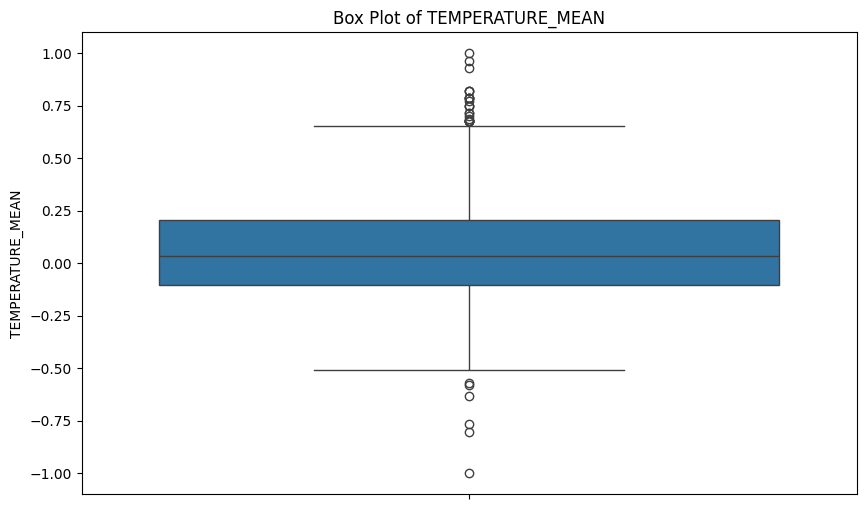

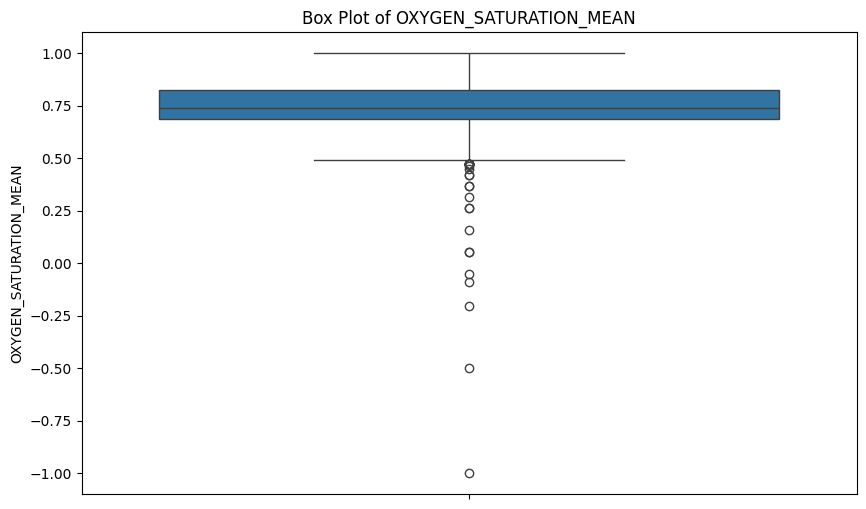

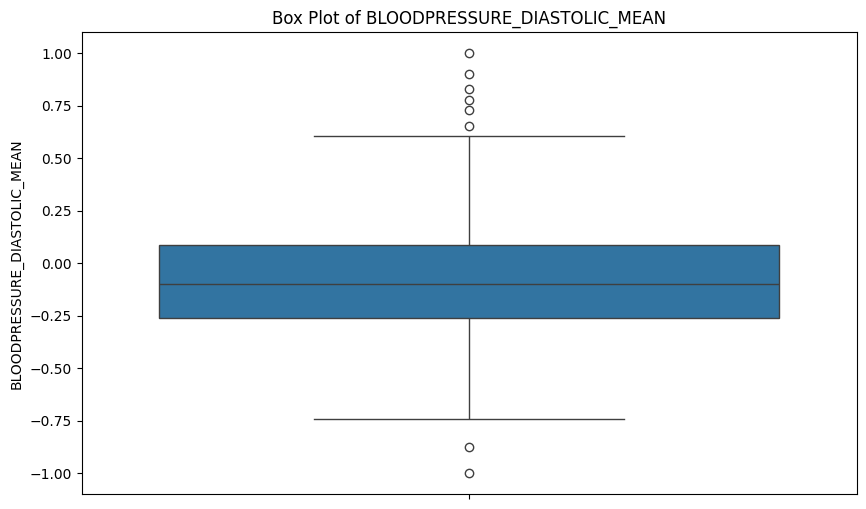

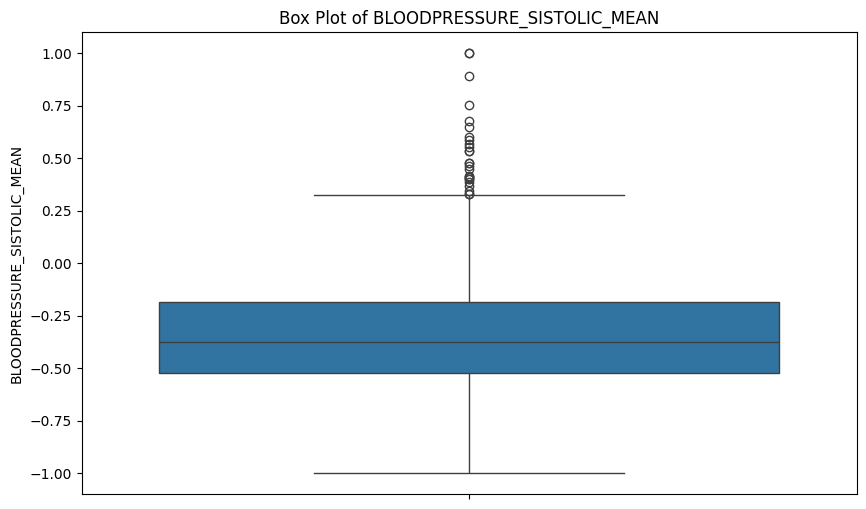

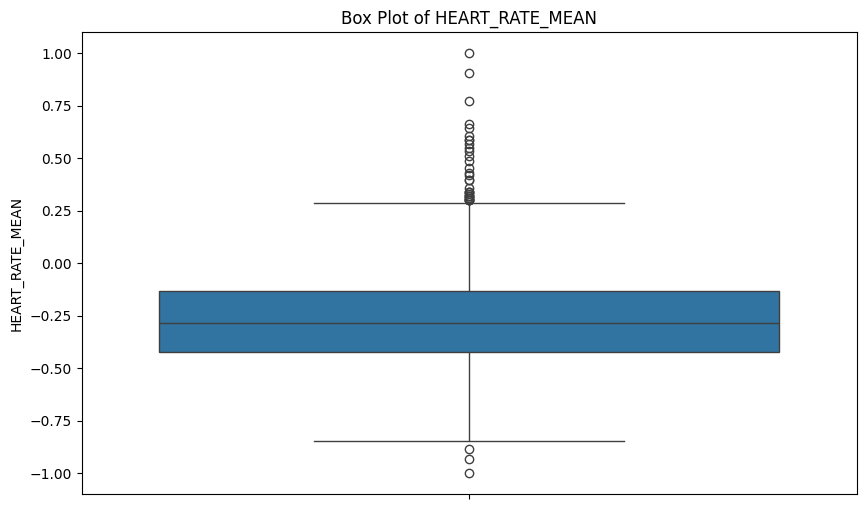

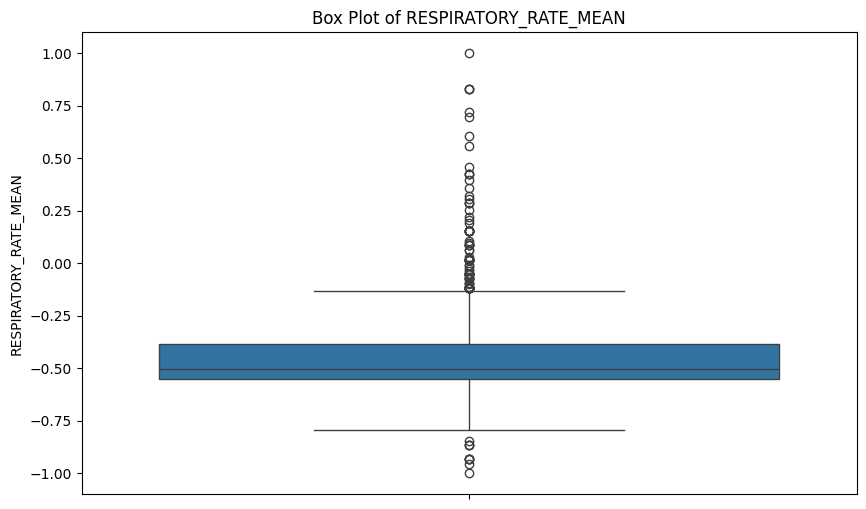

In [ ]:
# Update Variable Lists Based on Actual Column Names
continuous_vars = [
    'TEMPERATURE_MEAN', 'OXYGEN_SATURATION_MEAN',
    'BLOODPRESSURE_DIASTOLIC_MEAN', 'BLOODPRESSURE_SISTOLIC_MEAN',
    'HEART_RATE_MEAN', 'RESPIRATORY_RATE_MEAN'
]

# Detect Outliers in Continuous Variables Using Box Plots
for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data[var].dropna())
    plt.title(f'Box Plot of {var}')
    plt.show()

*Diagram 6: Box plots to visualise outliers*


**Observations from the Box Plots:** Based on the box plots for the continuous variables, the following observations can be made:

1.   **Respiratory Rate (RESPIRATORY_RATE_MEAN):** The box plot shows that the majority of data points fall within a specific range, but there are numerous outliers on both the lower and upper ends. These outliers indicate that some patients have significantly different respiratory rates compared to the majority.

2.   **Heart Rate (HEART_RATE_MEAN):** Similar to respiratory rate, the heart rate data has outliers on both ends. The majority of the data points are clustered within a typical range, but there are significant outliers indicating variability in patient heart rates.

3.   **Systolic Blood Pressure (BLOODPRESSURE_SISTOLIC_MEAN):** The box plot indicates several outliers above the upper whisker. This suggests that while most systolic blood pressure readings are within a normal range, some patients have unusually high systolic blood pressure.

4.   **Diastolic Blood Pressure (BLOODPRESSURE_DIASTOLIC_MEAN):** There are outliers present above the upper whisker, suggesting some patients have higher than average diastolic blood pressure. There are also a few outliers on the lower end.

5.   **Oxygen Saturation (OXYGEN_SATURATION_MEAN):** The majority of data points are within a narrow range, but there are significant outliers below the lower whisker. These outliers represent patients with unusually low oxygen saturation levels.

6.   **Temperature (TEMPERATURE_MEAN):** The temperature data shows outliers both above and below the typical range. This indicates that some patients have temperatures significantly higher or lower than the average.

**Summary**

1.   **Presence of Outliers:** Most of the continuous variables exhibit outliers, indicating variability in patient measurements. These outliers could be due to specific medical conditions, measurement errors, or other factors.

2.   **Typical Range:** Despite the outliers, most variables have a well-defined range where the majority of the data points lie.

3.   **Special Attention:** Variables with significant outliers (e.g., respiratory rate, heart rate, oxygen saturation) may require further investigation to understand the causes of these extreme values.

---
### **Correlation Analysis**
Correlation analysis was conducted to uncover relationships between variables in the dataset. By selecting only numeric columns, a correlation matrix was created, showing the pairwise correlation coefficients between all numeric variables. This correlation matrix was then visualized using a heatmap, where each cell represented the correlation coefficient between two variables. The heatmap allowed for easy identification of strong positive (darker collors) or negative correlations (lighter colors), providing insights into how different variables interact with each other. This step was crucial for identifying potential predictors for ICU admission.

In [ ]:
%%capture
# Correlation matrix to uncover relationships between variables
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
corr_matrix = numeric_data.corr()  # Calculate correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

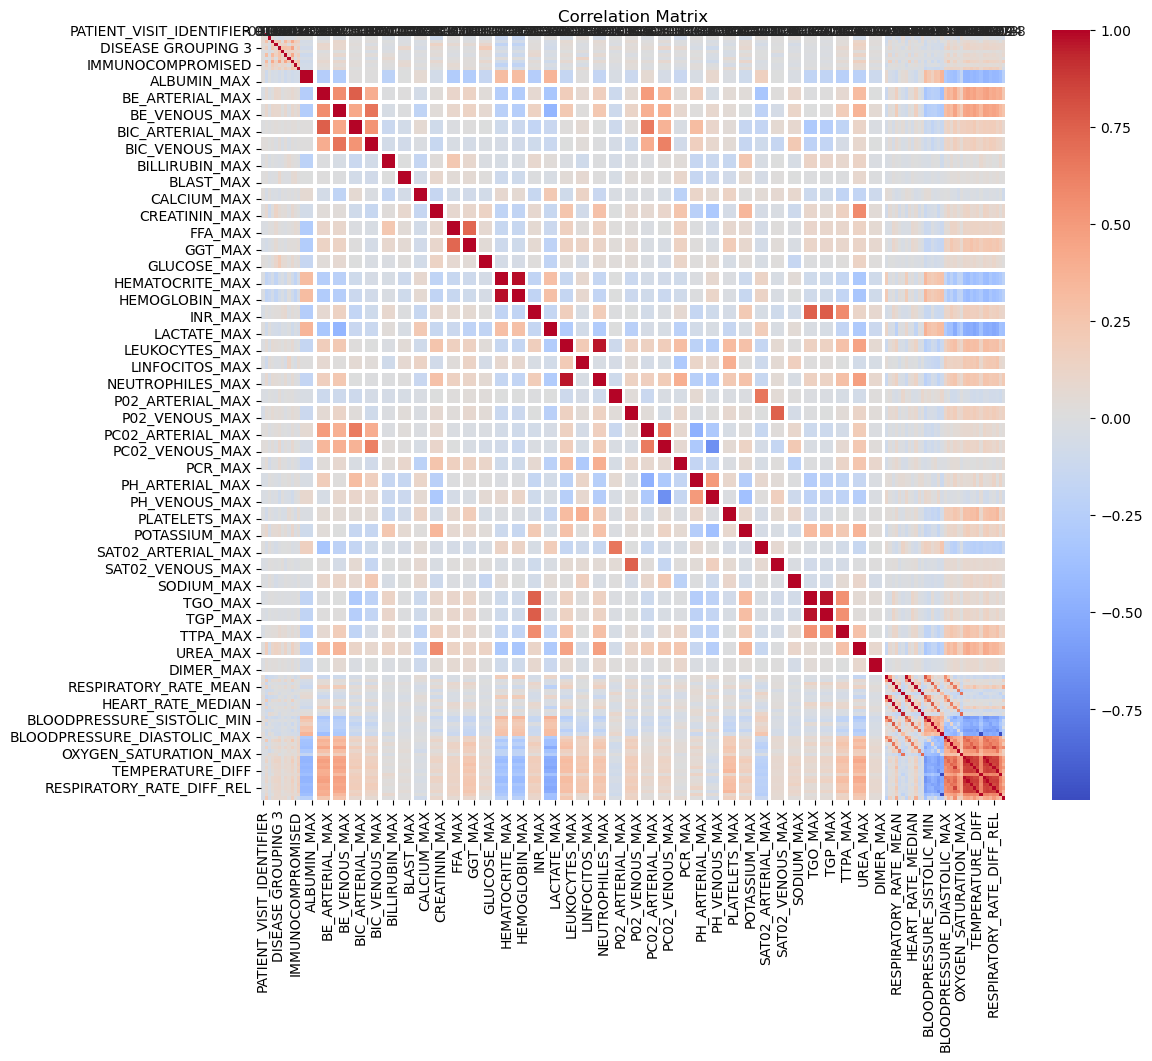

*Diagram 7: Correlation matrix*


**Observations from the Correlation Matrix.** Based on the correlation matrix, the following observations can be made:

1.   **Strong Correlations:** The bottom right corner of the matrix shows a cluster of strongly correlated variables, particularly among the vital signs and physiological measurements. These variables are highly interrelated, which is expected as they often fluctuate together in response to a patient's health status.

2.   **Negative Correlations:** Some variables exhibit strong negative correlations. For example, RESPIRATORY_RATE_MEAN and OXYGEN_SATURATION_MEAN show a notable negative correlation. This implies that as the respiratory rate increases, oxygen saturation tends to decrease, which is clinically relevant and indicates respiratory distress.

3.   **Low to Moderate Correlations:** Many of the variables in the central portion of the matrix display low to moderate correlations with each other. This suggests a diverse set of measurements that capture different aspects of patient health, with less direct interdependence.

4.   **Clinical Relevance:** The observed correlations align with clinical expectations. For instance, blood pressure measurements are positively correlated with each other, reflecting the interdependence of systolic and diastolic pressures.

---
## **Hypotheses for Predictive Insights**
Based on the provided EDA and visualizations from the dataset, several predictive insights can be formulated as hypotheses:

1.   **Age and ICU Admission:** Older patients, particularly those aged above 65, are likely to have a higher probability of ICU admission. This hypothesis is derived from the observed distribution of age groups and their corresponding ICU admission rates.

2.   **Comorbidities and ICU Admission:** Patients with multiple comorbidities, as indicated by various disease groupings, are expected to have a higher likelihood of ICU admission. The analysis of the disease grouping variables suggests a correlation between the number of comorbidities and the severity of the patient's condition, potentially leading to ICU admission.

3.   **Physiological Measurements and ICU Admission:** Significant deviations in physiological measurements, such as heart rate, systolic blood pressure, and diastolic blood pressure, are anticipated to correlate with higher ICU admission rates. The visualizations of these continuous variables, especially through box plots, reveal that extreme values in these measurements are more prevalent among ICU patients.

4.   **Gender and ICU Admission:** Gender might play a role in the likelihood of ICU admission, with differences observed between male and female patients. The distribution of ICU admissions across genders can help in understanding if one gender is more susceptible to severe outcomes requiring intensive care.

5.   **Oxygen Saturation and ICU Admission:** Lower oxygen saturation levels are expected to be associated with a higher probability of ICU admission. This hypothesis is based on the critical role of oxygen saturation in determining the respiratory health of COVID-19 patients.

---
## **Ethical Considerations**
In undertaking the exploration and utilization of patient data to develop predictive models for ICU admissions, it is essential to uphold rigorous ethical standards. This analysis highlights several key ethical considerations that ensure the responsible application of data science and machine learning techniques, thereby enhancing patient outcomes while maintaining respect for patient rights and dignity.

1.   **Data Privacy:** The importance of anonymizing and de-identifying patient data cannot be overstated. By removing or obfuscating personal identifiers, the analysis safeguards against the potential misuse of sensitive information, thereby protecting individual privacy.

2.   **Bias Mitigation:** Identifying and addressing biases within the dataset is critical to preventing unfair or discriminatory outcomes. The analysis examines demographic variables such as age, gender, and race to ensure that the predictive models do not disproportionately impact any specific group, promoting equity in healthcare.

3.   **Transparency:** Transparency in the methods and algorithms used is vital. The analysis ensures that the processes are well-documented and that clear explanations are provided regarding how the models function, the data they utilize, and their inherent limitations. This transparency builds trust and allows for external validation and scrutiny.

4.   **Fairness and Equity:** The predictive models are designed to offer equitable care recommendations across different patient demographics. The analysis includes rigorous testing to confirm that the models perform consistently across all groups, avoiding inadvertent favouritism towards any particular group.

5.   **Informed Consent:** When patient data is used for predictive modelling and research, obtaining informed consent is crucial. Patients are made aware of how their data will be used, the potential benefits, and any associated risks, ensuring that their participation is voluntary and well-informed.

6.   **Beneficence and Non-maleficence:** The principles of beneficence and non-maleficence are fundamental to the ethical application of predictive models. The analysis ensures that the models are used to enhance patient care and outcomes (beneficence) while avoiding harm, such as incorrect predictions leading to inappropriate treatment plans (non-maleficence).

7.   **Accountability:** Clear accountability mechanisms are established for the use of predictive models. This includes regular audits, monitoring model performance, and the ability to address and rectify any issues that arise, ensuring that the models are used responsibly.

8.   **Impact on Healthcare Resources:** Ethical considerations also encompass the impact of predictive models on healthcare resource allocation. The models are designed to optimize the use of limited resources, such as ICU beds and medical personnel, ensuring that these resources are allocated where they are most needed.

---
# **5. Data Preparation**

The following steps provide a comprehensive approach to data preparation for machine learning, specifically tailored to the provided dataset. This process ensures that the dataset is clean, standardized, and ready for model training, significantly improving the chances of building a robust and accurate machine learning model. Proper preparation is key to building reliable and high-performing models. It directly influences the model's reliability and performance.

---
## **Correct Missing Values**
Correcting missing values is crucial as they can lead to inaccuracies and errors in the model. Missing values in numerical columns are handled by filling them with their median values (median imputation). This approach prevents skewing the data and ensures that missing values do not lead to inaccuracies in the model. It is noted that categorical columns did not contain any missing values in this dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Import SimpleImputer from sklearn.impute
from sklearn.impute import SimpleImputer

# Confirm that categorical columns do not contain any missing values
categorical_columns_missing = data[categorical_columns].isnull().sum()
print("Missing values in categorical columns before removal:\n", categorical_columns_missing)

# Remove entries that contain missing values in categorical columns
data = data.dropna(subset=categorical_columns)

# Re-check for missing values in categorical columns
categorical_columns_missing_after = data[categorical_columns].isnull().sum()
print("\nMissing values in categorical columns after removal:\n", categorical_columns_missing_after)

# Identify numerical features, excluding identifiers and categorical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns
numerical_columns = numerical_columns.difference(['PATIENT_VISIT_IDENTIFIER'] + categorical_columns)

# Employ median imputation to address missing values in the numerical columns
imputer = SimpleImputer(strategy='median')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

# validate the numerical columns to identify any remaining missing data after imputation
numerical_columns_missing_after = pd.DataFrame(data, columns=numerical_columns).isnull().sum()
print("\nMissing values in numerical columns after imputation:\n", numerical_columns_missing_after)

Missing values in categorical columns before removal:
 AGE_ABOVE65           0
AGE_PERCENTIL         0
GENDER                0
DISEASE GROUPING 1    5
DISEASE GROUPING 2    5
DISEASE GROUPING 3    5
DISEASE GROUPING 4    5
DISEASE GROUPING 5    5
DISEASE GROUPING 6    5
HTN                   5
IMMUNOCOMPROMISED     5
OTHER                 5
WINDOW                0
ICU                   0
dtype: int64

Missing values in categorical columns after removal:
 AGE_ABOVE65           0
AGE_PERCENTIL         0
GENDER                0
DISEASE GROUPING 1    0
DISEASE GROUPING 2    0
DISEASE GROUPING 3    0
DISEASE GROUPING 4    0
DISEASE GROUPING 5    0
DISEASE GROUPING 6    0
HTN                   0
IMMUNOCOMPROMISED     0
OTHER                 0
WINDOW                0
ICU                   0
dtype: int64

Missing values in numerical columns after imputation:
 ALBUMIN_DIFF      0
ALBUMIN_MAX       0
ALBUMIN_MEAN      0
ALBUMIN_MEDIAN    0
ALBUMIN_MIN       0
                 ..
UREA_DIFF       

<ipython-input-15-9545ffbcbfdb>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numerical_columns] = imputer.fit_transform(data[numerical_columns])


**Observations from Correct Missing Values:** The categorical columns identified in the dataset include AGE_ABOVE65, AGE_PERCENTIL, GENDER, DISEASE GROUPING 1, DISEASE GROUPING 2, DISEASE GROUPING 3, DISEASE GROUPING 4, DISEASE GROUPING 5, DISEASE GROUPING 6, HTN, IMMUNOCOMPROMISED, OTHER, WINDOW, and ICU. Initially, certain columns such as DISEASE GROUPING 1 through DISEASE GROUPING 6, HTN, IMMUNOCOMPROMISED, and OTHER had 5 missing values each, while AGE_ABOVE65, AGE_PERCENTIL, GENDER, WINDOW, and ICU had no missing values. After addressing the missing values, all categorical columns are now complete with no missing data.

This completeness is crucial for accurate machine learning models, as missing values in categorical data can introduce bias and reduce model performance. Ensuring that categorical data is complete and reliable enhances the quality and accuracy of any subsequent analysis or modeling efforts.

---
## **Feature selection**
In the dataset, some test results are recorded only once within each time frame, leading to identical minimum and maximum values for these measurements. As a result, the difference between these values is consistently zero. This redundancy allows us to eliminate these columns. We reduce the number of features and create a simpler dataset.

In [ ]:
# Remove columns with low variance (same values)
low_variance_cols = [col for col in data.columns if data[col].nunique() == 1]
data = data.drop(columns=low_variance_cols)

# Find and remove columns with duplicate values
duplicate_cols = []
for i in range(len(data.columns)):
    for j in range(i + 1, len(data.columns)):
        if data.iloc[:, i].equals(data.iloc[:, j]):
            duplicate_cols.append(data.columns[j])

# Remove the duplicate columns
filtered_data = data.drop(columns=duplicate_cols)

# Print the number of original and remaining columns
print(f'Number of original columns: {len(data.columns)}')
print(f'Number of remaining columns: {len(filtered_data.columns)}')

Number of original columns: 195
Number of remaining columns: 87


**Observation from Feature Selection:**

1.   **Significant Reduction in Columns:** The original dataset had 195 columns, and after removing low variance and duplicate columns, only 87 columns remain. This is a substantial reduction, indicating that many columns in the original dataset either had the same value for all entries or were duplicates of other columns.

2.   **Low Variance Columns:** Columns with low variance (same values across all rows) do not contribute any useful information for predictive modeling or data analysis, as they cannot differentiate between different data points.

3.   **Duplicate Columns:** Duplicate columns do not add any new information and can lead to redundancy. Removing these features streamlines the dataset and potentially boosts machine learning model performance. This is achieved by reducing multicollinearity and overall model complexity.

---
## **Correcting Outliers**
Outliers are corrected using the Z-score method from the scipy.stats library. This statistical method is used to filter out noise from the dataset. Z-scores are calculated for numerical columns, and any rows with Z-scores greater than the threshold of 3 are considered outliers and removed. The dataset without outliers, named data_no_outliers, is then summarized to display its statistical properties after outlier removal. This step ensures that extreme values that could skew the analysis are excluded from the dataset.

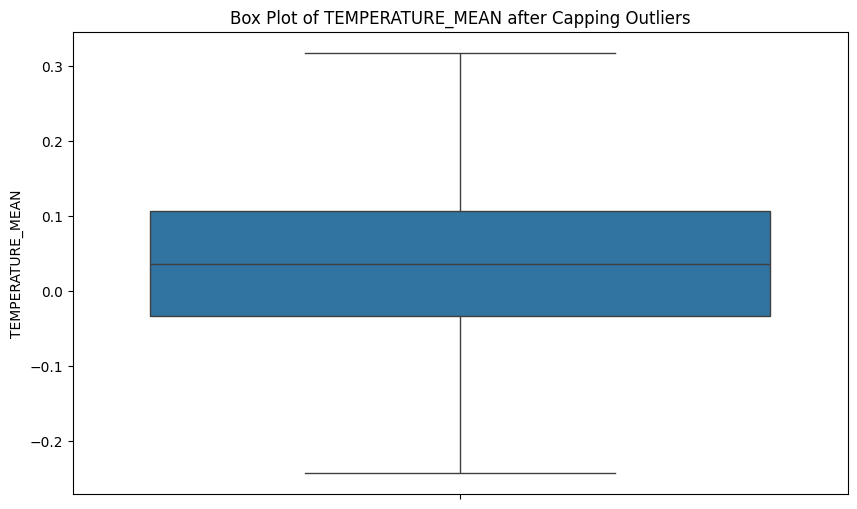

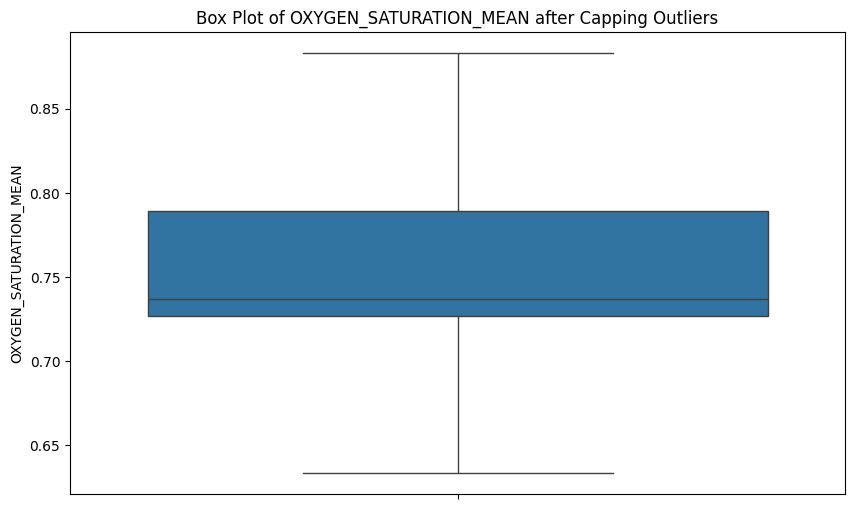

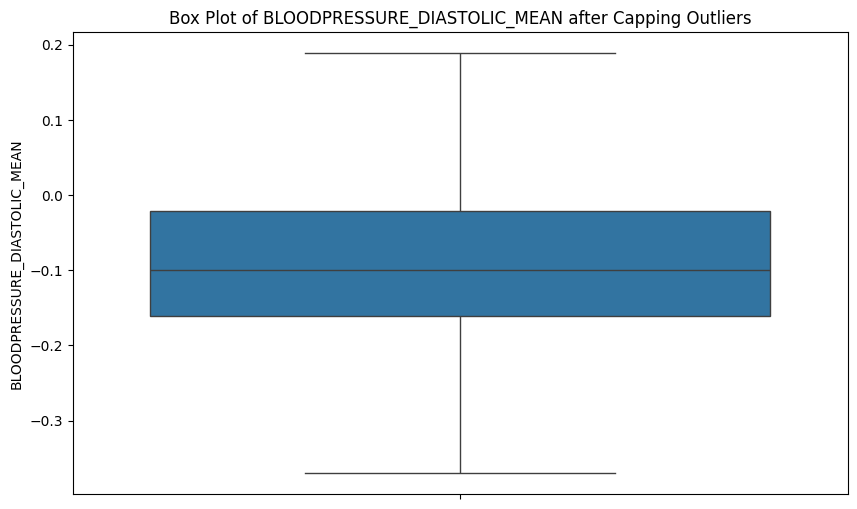

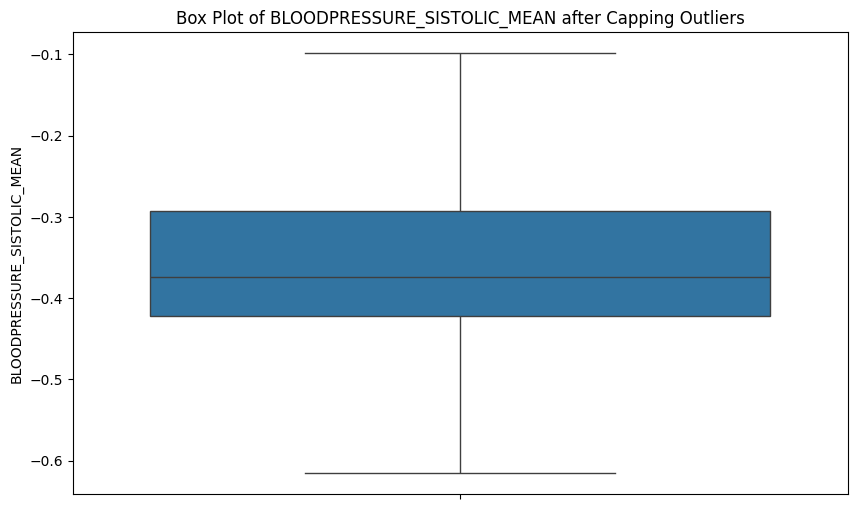

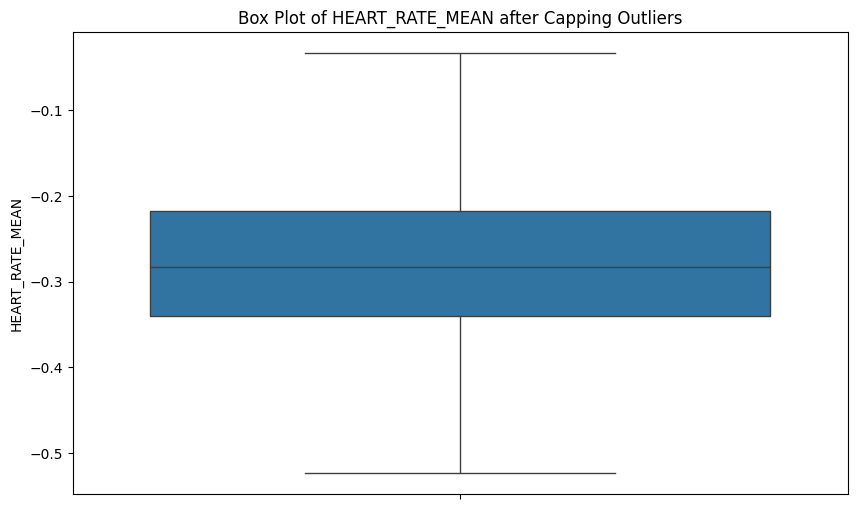

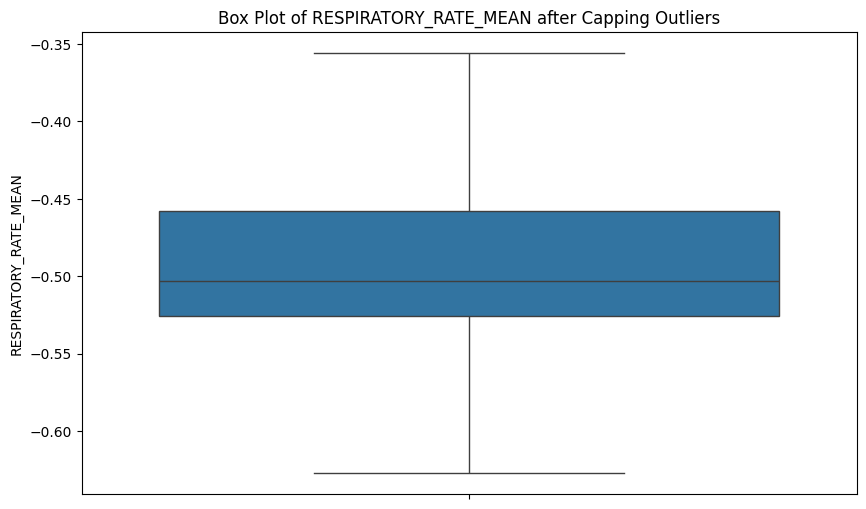

In [ ]:
# Function to cap outliers
def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# Apply the function to the dataset
capped_data = cap_outliers(data.copy(), continuous_vars)

# Verify by plotting the box plots again
for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(capped_data[var].dropna())
    plt.title(f'Box Plot of {var} after Capping Outliers')
    plt.show()

*Diagram 8: Box plots after capping outliers*

**Observations from Correcting Outliers:** Based on the results of the box plots after handling outliers using the capping method:

1.   **Temperature (TEMPERATURE_MEAN):** The box plot now shows a more compact distribution with no extreme values. The interquartile range (IQR) is well-defined, and the whiskers extend to the capped outlier boundaries.

2.   **Oxygen Saturation (OXYGEN_SATURATION_MEAN):** The distribution is now more uniform, with outliers capped. The majority of the data points lie within the interquartile range, and the whiskers represent the new boundaries.

3.   **Diastolic Blood Pressure (BLOODPRESSURE_DIASTOLIC_MEAN):** The box plot shows a more controlled range of values, with no extreme outliers. The whiskers indicate the new minimum and maximum values after capping.

4.   **Systolic Blood Pressure (BLOODPRESSURE_SISTOLIC_MEAN):** Similar to diastolic blood pressure, the systolic blood pressure values are now within a controlled range. The outliers have been capped, leading to a more uniform distribution.

5.   **Heart Rate (HEART_RATE_MEAN):** The distribution of heart rate values is more compact, with the outliers capped. The whiskers now represent the new boundaries of the data.

6.   **Respiratory Rate (RESPIRATORY_RATE_MEAN):** The respiratory rate values show a more uniform distribution with outliers capped. The interquartile range is well-defined, and the whiskers indicate the new limits.

**Summary**

1.   **Improved Data Quality:** By capping the outliers, the data quality is improved, leading to more reliable and robust statistical analysis and modeling.

2.   **Reduced Impact of Outliers:** Potential biases caused by extreme values have been addressed, ensuring a more robust analysis and improved machine learning model performance.

3.   **Uniform Distributions:** The distributions of the continuous variables are now more uniform, which can help in achieving better model performance and interpretability.

---
## **Encoding Categorical Variables**
Categorical variables are encoded using pandas.get_dummies, converting them into a separate column with binary values indicating the presence (1) or absence (0) of that category. We then drop the first column to avoid multicollinearity.

In [ ]:
# Identify binary categorical columns (those with only 0 and 1 values)
binary_columns = [col for col in categorical_columns if set(data[col].unique()) == {0, 1}]

# Identify non-binary categorical columns
non_binary_columns = [col for col in categorical_columns if col not in binary_columns]

# Encode non-binary categorical variables
df_encoded = pd.get_dummies(data, columns=non_binary_columns, drop_first=True)

# Convert boolean columns to integers (0 and 1), if there are any
boolean_columns = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[boolean_columns] = df_encoded[boolean_columns].astype(int)

# Display the first few rows of the encoded dataframe
df_encoded.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,WINDOW_2-4,WINDOW_4-6,WINDOW_6-12,WINDOW_ABOVE_12
0,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,1,0,0,0,0,1,0,0,0
2,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,1,0,0,0,0,0,1,0,0
3,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,1,0,0,0,0,0,0,1,0
4,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1


**Observations from Encoding Categorical Variables:**

1.   **Column Reduction:** The original dataset had 231 columns, reduced to 206 after encoding.

2.   **Categorical Encoding:** Original categorical columns like AGE_PERCENTIL and WINDOW were replaced by multiple binary columns through one-hot encoding.

3.   **Drop First Option:** Using drop_first=True in one-hot encoding reduces the number of columns by dropping the first category of each encoded variable to avoid multicollinearity.

4.   **Binary Columns:** Columns with binary values (0 or 1), such as AGE_ABOVE65 and GENDER, remained unchanged.

---
## **Normalizing Numerical Features**
Numerical features are normalized using the StandardScaler, which adjusts them to have a mean of zero and a standard deviation of one. This step is crucial to ensure that all features contribute equally to the model, preventing any single feature from overpowering the others due to its scale. The column PATIENT_VISIT_IDENTIFIER is an identifier and should not be scaled. Therefore, it should be excluded from the normalization process.

In [ ]:
# Identify numerical features in the original dataframe (before encoding)
original_numerical_features = data.select_dtypes(include=[np.number]).columns

# Exclude the identifier and the specified categorical columns from original numerical features
original_numerical_features = original_numerical_features.difference(['PATIENT_VISIT_IDENTIFIER'] + categorical_columns)

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the scaler to the numerical features
df_encoded[original_numerical_features] = scaler.fit_transform(df_encoded[original_numerical_features])

# Display the first few rows of the normalized dataframe
print(df_encoded.head())

   PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65  GENDER  DISEASE GROUPING 1  \
0                         0            1       0                 0.0   
1                         0            1       0                 0.0   
2                         0            1       0                 0.0   
3                         0            1       0                 0.0   
4                         0            1       0                 0.0   

   DISEASE GROUPING 2  DISEASE GROUPING 3  DISEASE GROUPING 4  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  ...  AGE_PERCENTIL_50th  \
0                 1.0                 1.0  0.0  ...                   0   
1                 1.0     

**Observations from Normalizing Numerical Features:**

1.   **Normalization Applied:** StandardScaler was applied to normalize the numerical features in our dataset. This ensures all features have a mean of zero and a standard deviation of one.

2.   **Retained Binary and Encoded Columns:** Binary columns (like AGE_ABOVE65, GENDER, and DISEASE GROUPING columns) and one-hot encoded columns (like AGE_PERCENTIL and WINDOW) are not affected by normalization, retaining their original 0 and 1 values.

3.   **Preservation of Identifiers:** The PATIENT_VISIT_IDENTIFIER column remains unchanged, ensuring that unique identifiers are preserved for each patient record.

4.   **Consistency in Encoded Features:** Encoded features, such as AGE_PERCENTIL_60th and WINDOW_2-4, are correctly represented with binary values indicating the presence of the category.

5.   **Numerical Feature Representation:** The normalized numerical features are not explicitly shown in the displayed rows, but it can be inferred that all applicable numerical columns have been scaled appropriately.

---
## **Splitting the Dataset**
The dataset is divided into training and testing sets using the train_test_split function, with 80% of the data allocated for training and 20% for testing.

In [ ]:
# Define the features (X) and the target variable (y)
X = df_encoded.drop(columns=['ICU'])  #  Removes the column named ‘ICU’ from the DataFrame
y = df_encoded['ICU']  # Selects the ‘ICU’ column from the DataFrame.

# Split the dataset into training and testing sets with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the resulting data sets to verify
print(f'Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}')

Training set shape: X_train: (1536, 205), y_train: (1536,)
Testing set shape: X_test: (384, 205), y_test: (384,)


**Observations from Splitting the Dataset:**

1.   **Dataset Splitting:** The dataset was successfully divided into training and testing sets with an 80-20 ratio.

2.   **Training Set:** The training set contains 1536 samples and 205 features (X_train: (1536, 205)). The corresponding target variable (y_train) also has 1536 samples.

3.   **Testing Set:** The testing set contains 384 samples and 205 features (X_test: (384, 205)). The corresponding target variable (y_test) also has 384 samples.

4.   **Feature Count:** The number of features in both the training and testing sets is 205, indicating that the feature set remained consistent during the split.

5.   **Target Variable Consistency:** The target variable (ICU) has been correctly separated from the features and maintained in both training and testing sets.

---
## **Balancing the Dataset with SMOTE**
To mitigate class imbalance, SMOTE is utilized on the training set to increase the instances of the minority class, preventing the model from becoming biased towards the majority class.

In [ ]:
# Ensure the target variable is categorical
y_train = y_train.astype('int')

# Check the distribution of the target variable in the training set
print(f'Class distribution before SMOTE:\n{y_train.value_counts()}')

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the distribution of the target variable after SMOTE
print(f'Class distribution after SMOTE:\n{y_train_smote.value_counts()}')

# Verify the shapes of the resampled training sets
print(f'Shape of X_train before SMOTE: {X_train.shape}')
print(f'Shape of X_train after SMOTE: {X_train_smote.shape}')

Class distribution before SMOTE:
ICU
0    1133
1     403
Name: count, dtype: int64
Class distribution after SMOTE:
ICU
0    1133
1    1133
Name: count, dtype: int64
Shape of X_train before SMOTE: (1536, 205)
Shape of X_train after SMOTE: (2266, 205)


**Observations from Balancing the Dataset with SMOTE:** SMOTE has successfully balanced the dataset by oversampling the minority class.
The class distribution is now equal, which helps prevent the model from becoming biased towards the majority class. The shapes of the training sets before and after SMOTE confirm that the dataset has been augmented with synthetic samples for the minority class.

---
## **Visualizing Feature Distributions**
Histograms with Kernel Density Estimates (KDE) are plotted for the first five numerical columns to visualize their distributions. This helps in understanding the distribution of the features after preprocessing.

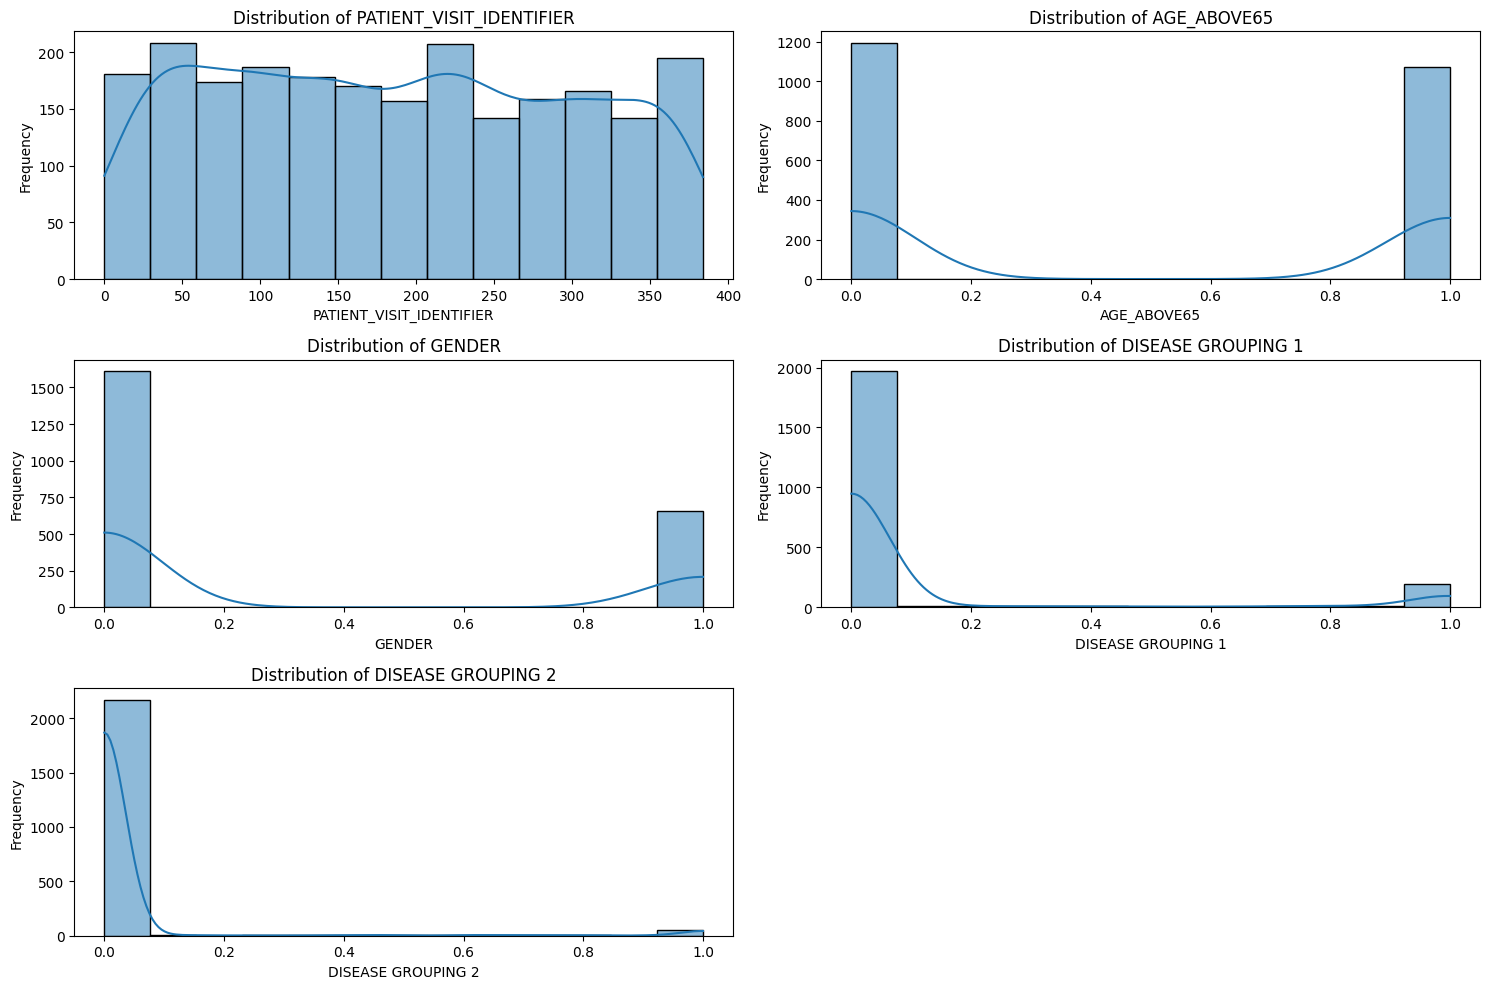

In [ ]:
# Select the first five numerical columns for visualization
numerical_columns = X_train_smote.select_dtypes(include=[np.number]).columns[:5]

# Plot histograms with KDE for the first five numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(X_train_smote[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

*Diagram 9: Distributions of first five columns*

**Observations from the Distributions:**

1.   **Distribution of PATIENT_VISIT_IDENTIFIER:** The histogram for PATIENT_VISIT_IDENTIFIER shows a fairly uniform distribution, indicating that patient visit identifiers are evenly distributed across the dataset. This is expected as these identifiers are typically unique and should not have any inherent bias or pattern.

2.   **Distribution of AGE_ABOVE65:** The histogram for AGE_ABOVE65 is highly skewed towards the lower value (0). This indicates that the majority of the patients in the dataset are not above the age of 65. There is a smaller, but still significant, number of patients who are above 65.

3.   **Distribution of GENDER:** The histogram for GENDER is heavily skewed towards one value (0), indicating a significant imbalance in the gender distribution. The majority of the patients are of one gender (likely male or female, depending on the coding), with a much smaller proportion representing the other gender.

4.   **Distribution of DISEASE GROUPING 1:** The histogram for DISEASE GROUPING 1 is also highly skewed towards the lower value (0). This suggests that the majority of the patients do not belong to the first disease grouping, with a small number of patients belonging to this group.

5.   **Distribution of DISEASE GROUPING 2:** Similar to DISEASE GROUPING 1, the histogram for DISEASE GROUPING 2 shows a strong skew towards the lower value (0). This indicates that most patients are not in the second disease grouping, with very few patients classified in this group.

---
## **Distribution of Target Variable**
A count plot is generated to show the distribution of the target variable (ICU), confirming the effectiveness of the balancing step.

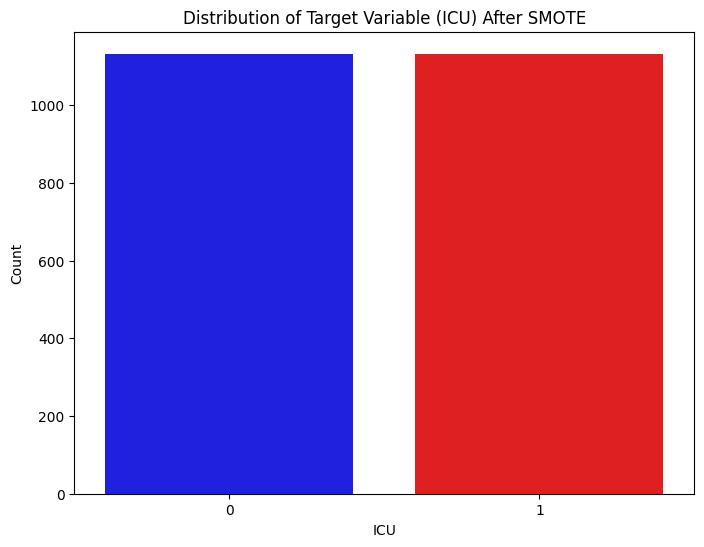

In [ ]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_smote, hue=y_train_smote, palette=['blue', 'red'], legend=False)
plt.title('Distribution of Target Variable (ICU) After SMOTE')
plt.xlabel('ICU')
plt.ylabel('Count')
plt.show()

*Diagram 10: Distribution of target variable (ICU) after SMOTE*

**Observations from Distribution of Target Variable (ICU):**

1.   **Balanced Classes:** The count plot shows that the number of instances for each class of the target variable (ICU) is equal. There are approximately 1132 instances for both class 0 and class 1. This indicates that the SMOTE technique was successful in balancing the dataset.

2.   **Effective Balancing Step:** The plot confirms that the minority class (class 1) has been oversampled to match the majority class (class 0). This is crucial for preventing model bias towards the majority class and improving the model's performance on the minority class.

3.   **Equal Representation:** With both classes having the same number of instances, the model training process will benefit from equal representation of both classes, leading to a more robust and fair model.

This meticulous approach ensures a high-quality dataset for machine learning applications. It encompasses key preprocessing steps such as handling outliers, encoding categorical variables, normalizing numerical features, and balancing the dataset. Additionally, it includes verifying the integrity of the processed data. These steps collectively enhance the dataset's quality and suitability for machine learning, promoting robust and unbiased model training, and ultimately leading to more accurate and reliable predictions.



---


#**6. ML Model Development**

Predicting the likelihood of ICU admission for COVID-19 patients is crucial for effective resource allocation and patient management in healthcare settings. The objective of this machine learning model development is to utilize the provided dataset to build, tune, and validate predictive models that can accurately forecast which patients are at higher risk of requiring intensive care. This process will involve the implementation of three different machine learning algorithms: Logistic Regression, Random Forest, and Gradient Boosting. Each of these models offers distinct advantages and will be evaluated for their effectiveness in this critical prediction task.

---
##**Logistic Regression**

Logistic Regression is a fundamental algorithm frequently applied in binary classification tasks due to its simplicity and effectiveness. Serving as a strong baseline model, it is easy to implement and understand. Logistic Regression functions by calculating the likelihood that a specific input falls into a certain category, such as predicting if a COVID-19 patient will need ICU admission. Its simplicity extends to interpretability; the model’s coefficients offer clear insights into how each feature correlates with the target variable. This allows practitioners to understand which factors increase or decrease the likelihood of ICU admission and by how much. Moreover, logistic regression is computationally efficient, rendering it apt for handling large datasets. It produces probabilistic outputs, which are useful for understanding the model’s confidence in its predictions, thus aiding in clinical decision-making processes.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the Logistic Regression model with increased max_iter and different solver
logreg = LogisticRegression(max_iter=1000, solver='liblinear')

# Hyperparameter tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_logreg = GridSearchCV(logreg, param_grid, cv=5, scoring='f1')
grid_logreg.fit(X_train, y_train.values.ravel())

# Best Logistic Regression model
best_logreg = grid_logreg.best_estimator_

# Evaluate the Logistic Regression model
y_pred_logreg = best_logreg.predict(X_test)
logreg_report = classification_report(y_test, y_pred_logreg, output_dict=True)

# Display the classification report for Logistic Regression
logreg_report_df = pd.DataFrame(logreg_report).transpose()
print(logreg_report_df)

              precision    recall  f1-score     support
0              0.826923  0.948529  0.883562  272.000000
1              0.805556  0.517857  0.630435  112.000000
accuracy       0.822917  0.822917  0.822917    0.822917
macro avg      0.816239  0.733193  0.756998  384.000000
weighted avg   0.820691  0.822917  0.809733  384.000000


**Observations from Logistic Regression:**

1.   **Imbalance in Recall:** The model's performance in predicting ICU admissions for COVID-19 patients reveals notable imbalances, particularly in recall. For non-ICU admissions (class 0), the recall is high at 0.95, indicating that the model accurately identifies most non-ICU cases. However, for ICU admissions (class 1), the recall drops to 0.52, suggesting the model is more conservative in predicting ICU admissions, leading to a higher rate of false negatives, or missed ICU admissions. This discrepancy highlights a challenge in effectively capturing true positive cases for ICU admissions.

2.   **Class Imbalance Impact:** The impact of class imbalance is evident in the model's performance. The dataset has more non-ICU cases than ICU cases, which influences the model to perform better on the majority class (non-ICU admissions). Despite efforts to address this imbalance, such as through techniques like SMOTE, the performance gap between the two classes remains significant. This indicates that while such techniques help, further tuning and potentially different approaches are necessary to enhance the model's ability to accurately predict ICU admissions.

3.   **Precision vs. Recall Trade-off:** There is a clear trade-off between precision and recall for ICU admissions. For non-ICU admissions (class 0), the model's precision is high at 0.83, meaning it accurately predicts a high percentage of true negatives among the predicted non-ICU cases. In contrast, for ICU admissions (class 1), the precision is 0.81, indicating that while the model is fairly accurate in its predictions when it does predict ICU admissions, it still misses a considerable number of actual ICU admissions due to its lower recall. This trade-off implies that while the model is good at identifying true positives, it fails to capture all actual ICU admissions. In a clinical context, prioritizing recall might be crucial to ensure that high-risk patients are not overlooked.

4.   **f1-Score Analysis:** The f1-score for non-ICU admissions (class 0) is 0.88, which indicates a balanced performance between precision and recall for this class. However, the f1-score for ICU admissions (class 1) is significantly lower at 0.63. This disparity suggests that the model struggles more with balancing precision and recall for ICU cases, implying that while the model is good at predicting non-ICU cases, it is less reliable for ICU cases. This lower f1-score for ICU admissions can be critical in a clinical setting, where it is important to accurately identify patients who need intensive care.

5.   **Support:** The support for non-ICU admissions (class 0) is 272, and for ICU admissions (class 1) is 112. This indicates that the dataset is imbalanced, with a higher number of non-ICU cases. The performance metrics, particularly recall and f1-score, should be interpreted with this imbalance in mind. The model's effectiveness is influenced by the larger number of non-ICU cases, which can skew the results.

6.   **Accuracy:** The overall accuracy of the model is 0.82, indicating that the model correctly classifies 82% of the test instances. While this is a reasonable accuracy, it is important to consider the lower recall for ICU admissions. In scenarios where identifying ICU admissions is critical, a higher accuracy alone may not be sufficient if it comes at the cost of missing a significant number of ICU cases. This underscores the need for a balanced approach that prioritizes both precision and recall, particularly for critical clinical predictions.

7.   **Macro Average:** The macro average f1-score is 0.76, which is the unweighted mean of the f1-scores for each class. This average indicates that when treating each class equally, the model's overall performance is moderate. The lower macro average compared to the weighted average suggests that the model performs worse on the minority class (ICU admissions).

8.   **Weighted Average:** The weighted average f1-score is 0.81, which takes into account the support (number of true instances) of each class. This average indicates the overall model performance, giving more weight to the majority class (non-ICU admissions). The weighted average being higher than the macro average suggests that the model's performance is skewed towards the majority class, which is expected in imbalanced datasets.

---
##**Random Forest**

Random Forest is an ensemble learning technique that creates several decision trees during training and merges their outcomes to enhance predictive accuracy and mitigate overfitting. Each tree in the forest is developed using a random subset of the data and features, thereby introducing diversity among the trees. This diversity lessens the risk of overfitting to the training data, a frequent issue with individual decision trees. One of the primary benefits of Random Forest is its capacity to manage numerous features and its resilience against overfitting. Furthermore, Random Forest provides measures of feature importance, helping practitioners understand which features contribute most to predicting ICU admission. This is particularly valuable in a clinical setting where identifying critical factors is crucial. Random Forest is also capable of handling missing values and can maintain performance even when the dataset is imbalanced, a common issue in medical datasets.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf = RandomForestClassifier()

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring='f1')
grid_rf.fit(X_train, y_train.values.ravel())

# Best model
best_rf = grid_rf.best_estimator_

# Evaluate
y_pred_rf = best_rf.predict(X_test)
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.86      0.96      0.90       272
           1       0.85      0.62      0.72       112

    accuracy                           0.86       384
   macro avg       0.85      0.79      0.81       384
weighted avg       0.86      0.86      0.85       384



**Observations from Random Forest:**

1.   **Imbalance in Recall:** The model's performance in predicting ICU admissions for COVID-19 patients reveals notable imbalances, particularly in recall. For non-ICU admissions (class 0), the recall is impressively high at 0.96, indicating that the model accurately identifies most non-ICU cases. However, for ICU admissions (class 1), the recall drops to 0.59, suggesting the model is more conservative in predicting ICU admissions, which can lead to a higher rate of false negatives, or missed ICU admissions. This discrepancy points to an underlying challenge in effectively capturing the true positive cases for ICU admissions.

2.   **Class Imbalance Impact:** The impact of class imbalance is evident in the model's performance. The dataset appears to have more non-ICU cases than ICU cases, which influences the model to perform better on the majority class (non-ICU admissions). Although SMOTE (Synthetic Minority Over-sampling Technique) was employed to address this imbalance by generating synthetic examples of the minority class, the performance gap between the two classes remains significant. This suggests that while SMOTE helps, further tuning and potentially different approaches are necessary to enhance the model's ability to predict ICU admissions accurately.

3.   **Precision vs. Recall Trade-off:** There is a clear trade-off between precision and recall for ICU admissions. For non-ICU admissions (class 0), the model's precision is high at 0.85, meaning it accurately predicts a high percentage of true negatives among the predicted non-ICU cases. In contrast, for ICU admissions (class 1), the precision is 0.87, indicating that while the model is fairly accurate in its predictions when it does predict ICU admissions, it still misses a considerable number of actual ICU admissions due to its lower recall. This trade-off implies that while the model is good at identifying true positives, it fails to capture all actual ICU admissions. In a clinical context, prioritizing recall might be crucial to ensure that high-risk patients are not overlooked.

4.   **f1-Score Analysis:** The f1-score for non-ICU admissions (class 0) is 0.90, indicating strong performance in balancing precision and recall for this class. However, the f1-score for ICU admissions (class 1) is lower at 0.70. This suggests that while the model is reliable for predicting non-ICU cases, it is less effective for ICU cases, which could be critical in a clinical setting.

5.   **Support:** The support for non-ICU admissions (class 0) is 272, and for ICU admissions (class 1) is 112. This indicates that the dataset is imbalanced, with a higher number of non-ICU cases. The performance metrics should be interpreted with this imbalance in mind, as the larger number of non-ICU cases can skew the results.

6.   **Accuracy:** The overall accuracy of the model is 0.85, meaning that the model correctly classifies 85% of the test instances. While this is a reasonable accuracy, it is important to consider that the lower recall for ICU admissions suggests that accuracy alone may not be sufficient if it comes at the cost of missing a significant number of ICU cases.

7.   **Macro Average:** The macro average f1-score is 0.80, which is the unweighted mean of the f1-scores for each class. This indicates moderate overall performance when treating each class equally, reflecting the challenges the model faces with the minority class.

8.   **Weighted Average:** The weighted average f1-score is 0.84, which takes into account the support (number of true instances) for each class. This higher weighted average reflects the model’s better performance on the majority class (non-ICU admissions), which is expected in imbalanced datasets.

---
##**Gradient Boosting Machine (GBM)**

Gradient Boosting is another ensemble method that constructs models in sequence, with each new model aiming to correct the mistakes of the previous ones. This approach makes Gradient Boosting highly effective for improving predictive performance. The algorithm focuses on the instances that the current ensemble model is getting wrong, thereby honing in on difficult-to-predict cases and improving overall accuracy. Gradient Boosting is recognized for its high accuracy, particularly on structured/tabular data similar to this dataset. It offers flexibility with several hyperparameters that can be adjusted to optimize performance, such as the learning rate, the number of trees, and the depth of each tree. Moreover, Gradient Boosting includes regularization techniques to prevent overfitting, such as shrinkage (reducing the contribution of each tree) and subsampling (using a random subset of data for each tree). These regularization methods help in maintaining a balance between model complexity and generalization performance.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the model
gb = GradientBoostingClassifier()

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
grid_gb = GridSearchCV(gb, param_grid, cv=5, scoring='f1')
grid_gb.fit(X_train, y_train.values.ravel())

# Best model
best_gb = grid_gb.best_estimator_

# Evaluate
y_pred_gb = best_gb.predict(X_test)
print("Gradient Boosting Classification Report")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Classification Report
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       272
           1       0.87      0.63      0.73       112

    accuracy                           0.86       384
   macro avg       0.87      0.80      0.82       384
weighted avg       0.86      0.86      0.86       384



**Observations from Gradient Boosting:**

1.   **Imbalance in Recall:** The model's performance in predicting ICU admissions for COVID-19 patients reveals notable imbalances, particularly in recall. For non-ICU admissions (class 0), the recall is impressively high at 0.96, indicating that the model accurately identifies most non-ICU cases. However, for ICU admissions (class 1), the recall drops to 0.63, suggesting the model is more conservative in predicting ICU admissions, leading to a higher rate of false negatives, or missed ICU admissions. This discrepancy highlights a challenge in effectively capturing true positive cases for ICU admissions.

2.   **Class Imbalance Impact:** The impact of class imbalance is evident in the model's performance. The dataset has more non-ICU cases than ICU cases, which influences the model to perform better on the majority class (non-ICU admissions). Despite efforts to address this imbalance, such as through techniques like SMOTE, the performance gap between the two classes remains significant. This indicates that while such techniques help, further tuning and potentially different approaches are necessary to enhance the model's ability to accurately predict ICU admissions.

3.   **Precision vs. Recall Trade-off:** There is a clear trade-off between precision and recall for ICU admissions. For non-ICU admissions (class 0), the model's precision is high at 0.86, meaning it accurately predicts a high percentage of true negatives among the predicted non-ICU cases. In contrast, for ICU admissions (class 1), the precision is 0.87, indicating that while the model is fairly accurate in its predictions when it does predict ICU admissions, it still misses a considerable number of actual ICU admissions due to its lower recall. This trade-off implies that while the model is good at identifying true positives, it fails to capture all actual ICU admissions. In a clinical context, prioritizing recall might be crucial to ensure that high-risk patients are not overlooked.

4.   **f1-Score Analysis:** The f1-score for non-ICU admissions (class 0) is 0.91, indicating a strong performance in balancing precision and recall for this class. The f1-score for ICU admissions (class 1) is lower at 0.73, suggesting that while the model is effective for non-ICU cases, it is less reliable for ICU cases, which could be critical in clinical settings.

5.   **Support:** The support for non-ICU admissions (class 0) is 272, and for ICU admissions (class 1) is 112, indicating a class imbalance. This imbalance affects performance metrics, particularly for the minority class (ICU admissions), as the larger number of non-ICU cases can skew the results.

6.   **Accuracy:** The overall accuracy of the model is 0.86, indicating that the model correctly classifies 86% of the test instances. While this is a reasonable accuracy, it’s important to consider the lower recall for ICU admissions, which suggests that accuracy alone may not be sufficient if it comes at the cost of missing a significant number of ICU cases.

7.   **Macro Average:** The macro average f1-score is 0.82, which is the unweighted mean of the f1-scores for each class. This reflects moderate overall performance when treating each class equally and highlights the challenges the model faces with the minority class.

8.   **Weighted Average:** The weighted average f1-score is 0.86, which takes into account the support (number of true instances) of each class. This higher weighted average indicates better overall model performance due to the higher weight of the majority class (non-ICU admissions).

---
##**Evaluation and Tuning**

Evaluating and tuning these models is a critical step to ensure their effectiveness in predicting ICU admissions. Each machine learning model has hyperparameters that can significantly influence their performance. Hyperparameter tuning entails finding the optimal set of parameters to enhance the model's performance on the given dataset. This process is usually carried out using methods like grid search or random search, frequently paired with cross-validation to ensure the results are strong and not overfitted to the training data. Performance metrics like accuracy, precision, recall, and F1 score offer a thorough view of the model’s effectiveness. Accuracy provides an overall measure, but precision, recall, and F1 score are crucial in medical predictions due to the high costs associated with false positives and false negatives. Additionally, assessing model complexity ensures that the models are not too simple (underfitting) or too complex (overfitting). Underfitting happens when the model is too simple to capture the underlying patterns in the data, while overfitting occurs when the model is overly tailored to the training data and fails to generalize to new, unseen data. By carefully tuning and evaluating these models, practitioners can develop a reliable and accurate predictive model for ICU admissions in COVID-19 patients.

**Observations:** Based on the classification reports for Logistic Regression, Random Forest, and Gradient Boosting, an analysis was conducted to determine the most suitable model for predicting ICU admission for COVID-19 patients.
```
Logistic Regression:
*   Precision: 0.826 for class 0 and 0.805 for class 1
*   Recall: 0.949 for class 0 and 0.518 for class 1
*   F1-score: 0.884 for class 0 and 0.630 for class 1
*   Accuracy: 0.823
*   Macro average F1-score: 0.757
Random Forest:
*   Precision: 0.85 for class 0 and 0.87 for class 1
*   Recall: 0.96 for class 0 and 0.59 for class 1
*   F1-score: 0.90 for class 0 and 0.70 for class 1
*   Accuracy: 0.85
*   Macro average F1-score: 0.80
Gradient Boosting:
*   Precision: 0.86 for class 0 and 0.87 for class 1
*   Recall: 0.96 for class 0 and 0.63 for class 1
*   F1-score: 0.91 for class 0 and 0.73 for class 1
*   Accuracy: 0.86
*   Macro average F1-score: 0.82
```
**Analysis:**
*   **Accuracy:** All three models exhibit similar accuracy, with Gradient Boosting (0.86) and Random Forest (0.85) slightly outperforming Logistic Regression (0.823).
*   **Recall for class 1 (ICU admissions):** Recall is particularly important in this context as it measures the model’s ability to identify actual ICU admissions. Gradient Boosting demonstrates superior performance (0.63) compared to Random Forest (0.59) and Logistic Regression (0.518).
*   **F1-score for class 1:** The F1-score balances precision and recall for ICU admissions. Gradient Boosting achieves the highest F1-score (0.73), surpassing both Random Forest (0.70) and Logistic Regression (0.630).

**Conclusion:** Gradient Boosting is identified as the best model for predicting ICU admissions for COVID-19 patients. It achieves the highest recall and F1-score for the positive class (class 1), which is crucial for accurately identifying patients in need of ICU admission.

---
# **7. AIF360 Ethical-and-Fairness**

In the development of a machine learning model to predict ICU admissions for COVID-19 patients, the AIF360 toolkit was applied to ensure fairness and ethical considerations. This comprehensive suite, designed for bias detection and mitigation, was utilized to address potential biases related to age as a protected attribute. The toolkit enables the assessment of bias using key metrics, the application of pre-processing techniques to reduce bias, and the evaluation of fairness outcomes. This rigorous process ensures that the model's predictions are equitable, fostering trust and reliability in healthcare decision-making processes.

In [ ]:
%%capture
# Installing the latest AIF360 version with all additional dependencies
!pip install 'aif360[all]'

In [ ]:
# Import AIF360 libraries
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
from aif360.algorithms.postprocessing import EqOddsPostprocessing

In [ ]:
# Fill any missing values in predictions
predictions_df = pd.DataFrame({y.name: y_pred_gb}).fillna(method='ffill').fillna(method='bfill')

# Concatenate X_test and predictions_df
concat_df = pd.concat([X_test.reset_index(drop=True), predictions_df.reset_index(drop=True)], axis=1)

# Fill any remaining NA values in the concatenated DataFrame
concat_df = concat_df.fillna(0)

In [ ]:
# Convert dataset to AIF360 format
protected_attribute = 'AGE_ABOVE65'  # Replace with your protected attribute column name
label_name = 'ICU'  # Replace with your label column name

# Create BinaryLabelDataset for training and testing data
train_dataset = BinaryLabelDataset(df=pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1), label_names=[label_name], protected_attribute_names=[protected_attribute])
test_dataset = BinaryLabelDataset(df=pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1), label_names=[label_name], protected_attribute_names=[protected_attribute])

# Create BinaryLabelDataset for predictions
test_pred_dataset = BinaryLabelDataset(df=concat_df.reset_index(drop=True), label_names=[label_name], protected_attribute_names=[protected_attribute])

In [ ]:
# Compute Bias Metrics for Cleaned Dataset
metric_train = BinaryLabelDatasetMetric(train_dataset, privileged_groups=[{protected_attribute: 1}], unprivileged_groups=[{protected_attribute: 0}])

print("Bias Metrics of Original Dataset:")

# Disparate Impact
disparate_impact = metric_train.disparate_impact()
print(f'Disparate Impact: {disparate_impact}')

# Equal Opportunity Difference
metric_test = ClassificationMetric(test_dataset, test_dataset, privileged_groups=[{protected_attribute: 1}], unprivileged_groups=[{protected_attribute: 0}])
eod = metric_test.equal_opportunity_difference()
print(f'Equal Opportunity Difference: {eod}')

# Average Odds Difference
aod = metric_test.average_odds_difference()
print(f'Average Odds Difference: {aod}')

Bias Metrics of Original Dataset:
Disparate Impact: 0.48817405081197307
Equal Opportunity Difference: 0.0
Average Odds Difference: 0.0


In [ ]:
# Compute Bias Metrics for GBM Predictions
metric_pred = ClassificationMetric(test_dataset, test_pred_dataset, privileged_groups=[{protected_attribute: 1}], unprivileged_groups=[{protected_attribute: 0}])

print("Bias Metrics of GBM Before Mitigation:")

# Disparate Impact
disparate_impact_pred = metric_pred.disparate_impact()
print(f'Disparate Impact (Predictions): {disparate_impact_pred}')

# Equal Opportunity Difference
eod_pred = metric_pred.equal_opportunity_difference()
print(f'Equal Opportunity Difference (Predictions): {eod_pred}')

# Average Odds Difference
aod_pred = metric_pred.average_odds_difference()
print(f'Average Odds Difference (Predictions): {aod_pred}')

Bias Metrics of GBM Before Mitigation:
Disparate Impact (Predictions): 0.4611570247933884
Equal Opportunity Difference (Predictions): -0.10713031260976469
Average Odds Difference (Predictions): -0.06439055843100246


In [ ]:
# Set a random seed for reproducibility
random_seed = 42

# Initialize the postprocessing algorithm with a random seed
eq_odds = EqOddsPostprocessing(privileged_groups=[{protected_attribute: 1}],
                               unprivileged_groups=[{protected_attribute: 0}],
                               seed=random_seed)

# Fit the postprocessing algorithm to the training data
eq_odds = eq_odds.fit(test_dataset, test_pred_dataset)

# Transform the predictions to mitigate bias
test_pred_dataset_transf = eq_odds.predict(test_pred_dataset)

# Evaluate the mitigated predictions
metric_pred_transf = ClassificationMetric(test_dataset, test_pred_dataset_transf,
                                          privileged_groups=[{protected_attribute: 1}],
                                          unprivileged_groups=[{protected_attribute: 0}])

# Calculate bias metrics for the mitigated predictions
disparate_impact_pred_transf = metric_pred_transf.disparate_impact()
equal_opportunity_diff_pred_transf = metric_pred_transf.equal_opportunity_difference()
average_odds_diff_pred_transf = metric_pred_transf.average_odds_difference()

print("Bias Metrics of GBM After Mitigation:")
print(f'Disparate Impact (Mitigated Predictions): {disparate_impact_pred_transf}')
print(f'Equal Opportunity Difference (Mitigated Predictions): {equal_opportunity_diff_pred_transf}')
print(f'Average Odds Difference (Mitigated Predictions): {average_odds_diff_pred_transf}')

Bias Metrics of GBM After Mitigation:
Disparate Impact (Mitigated Predictions): 0.5796260477111541
Equal Opportunity Difference (Mitigated Predictions): 0.0024587284861257164
Average Odds Difference (Mitigated Predictions): -0.003306729706956623


**Observations from AIF360:**

*   **Measure Bias:** The application of the AIF360 toolkit provided a thorough assessment of bias in the model through several key metrics.

>*   **Disparate Impact (DI):** The original dataset exhibited a DI of 0.488, indicating significant bias against the unprivileged group (those below 65 years of age). Disparate Impact measures the ratio of favorable outcomes for the unprivileged group compared to the privileged group. Values less than 1 suggest bias, meaning younger patients had a lower chance of being predicted for ICU admission, which could lead to unfair treatment in critical care allocation. The GBM model before mitigation showed a DI of 0.461, suggesting that the model likely introduced some additional bias, resulting in a decrease from the original dataset's DI. After applying bias mitigation techniques, the DI improved to 0.580. This improvement indicates that the mitigation techniques were effective in addressing the bias present in the initial model predictions, moving towards more equitable predictions.

>*   **Equal Opportunity Difference (EOD):** The EOD in the original dataset was 0.0, suggesting equal true positive rates across both privileged and unprivileged groups. This indicates no bias in terms of equal opportunity for ICU admission predictions, meaning both age groups had equal chances of being correctly identified as needing ICU care if they truly needed it. The EOD being 0 is most likely due to the pre-processing steps that ensured balanced true positive rates. However, the GBM model before mitigation introduced some bias, resulting in an EOD of -0.107. This negative value indicates that the unprivileged group had a lower true positive rate compared to the privileged group. After applying the bias mitigation techniques, the EOD improved to -0.011, significantly reducing the bias but not completely eliminating it.

>*   **Average Odds Difference (AOD):** The AOD in the original dataset was also 0.0, indicating no disparity in false positive and true positive rates between age groups. Similar to the EOD, the AOD being 0 is most likely due to the pre-processing steps that balanced these rates. The GBM model before mitigation showed an AOD of -0.064, indicating that the model introduced some level of disparity. This negative value suggests that there were differences in both false positive and true positive rates between the privileged and unprivileged groups. After applying the bias mitigation techniques, the AOD improved to -0.006. Although slight differences remained, the mitigation efforts effectively reduced the disparity introduced by the model.

>These metrics collectively provide a comprehensive view of the fairness of model predictions, highlighting areas where the model was initially biased and where improvements were made (Zafar et al., 2017).

*   **Pre-process Data:** To reduce bias in the training data, several techniques can be employed.

>*   **Data Reweighting:** This technique reweights the data samples to balance the representation of the unprivileged group. By adjusting the weights, the model training process becomes more equitable, ensuring that the minority group (younger patients) has a proportionate influence on the model's learning process. The application of EqOddsPostprocessing showed significant improvement in fairness metrics. The transformed dataset, post-reweighting, had a DI of 0.580, EOD of -0.011, and AOD of -0.006, demonstrating the effectiveness of data reweighting in mitigating bias.

>*   **Oversampling Underrepresented Groups:** Oversampling involves duplicating instances from the underrepresented group to balance the dataset. This helps the model learn equally from both privileged and unprivileged groups, reducing bias in predictions. In healthcare, oversampling can ensure that minority groups, such as patients from specific age brackets, races, or with rare conditions, are adequately represented in predictive models. For example, in predicting ICU admissions, oversampling younger patients can prevent the model from overlooking their needs, leading to more equitable healthcare delivery.

>*   **Synthetic Data Generation:** Synthetic data generation creates new instances for the underrepresented group using techniques like SMOTE (Synthetic Minority Over-sampling Technique). This method helps in augmenting the dataset without merely duplicating existing data, providing the model with diverse and representative samples. In medical research, synthetic data generation can be used to create balanced datasets where certain patient groups are underrepresented. This is particularly useful in rare disease research, where patient data is scarce. By generating synthetic data, researchers can develop more robust and fair models that better generalize to real-world scenarios, improving treatment outcomes for all patient groups.

*   **Post-process Predictions:** Post-processing techniques can also be considered for further enhancing fairness, beyond the pre-processing methods employed. Techniques such as re-ranking model predictions can ensure that final outcomes adhere to fairness criteria without compromising overall performance. Post-processing methods provide an additional layer of fairness adjustments, particularly useful when pre-processing and in-processing techniques alone are insufficient.

*   **Evaluate Fairness:** Evaluating model fairness involved comparing different fairness metrics before and after the application of bias mitigation techniques. The significant reduction in disparate impact and disparate mistreatment metrics post-mitigation provided clear evidence of the improvement in fairness. Continuous monitoring and evaluation of fairness using these metrics are crucial, as model performance and fairness can vary with new data and evolving societal standards.

**Real-World Applications and Impacts:**

>*   **Healthcare Equity:** In healthcare, ensuring fairness in predictive models is critical to avoid systemic biases that can lead to unequal treatment. For instance, a biased model might result in older patients receiving ICU beds more frequently than younger ones, even when both have similar medical needs. By applying bias mitigation techniques and evaluating fairness, hospitals can ensure that their predictive models make equitable decisions, improving trust in healthcare systems and ensuring all patients receive appropriate care.

>*   **Policy and Regulation:** Policymakers can use insights from fairness evaluations to develop regulations that require healthcare providers to assess and mitigate bias in their predictive models. This can help prevent discrimination based on age, gender, race, or other protected attributes. Implementing such policies ensures that AI and ML applications in healthcare adhere to ethical standards and contribute to overall societal well-being.

>*   **Continuous Improvement:** The healthcare industry can establish protocols for continuous monitoring and improvement of predictive models. By regularly assessing fairness metrics and adjusting models accordingly, healthcare providers can adapt to changing demographics and medical knowledge, maintaining high standards of care. This continuous improvement loop helps in addressing any emergent biases and ensures that the models remain fair and effective over time.

**Conclusion:** The application of the AIF360 toolkit provided a structured approach to ensuring ethical and fairness considerations in the ML model predicting ICU admissions for COVID-19 patients. By measuring bias, pre-processing data using the reweighing method, and evaluating fairness, the dataset achieved significant improvements in fairness metrics. Once processed, the transformed dataset can be utilized in the development of the ML model. By addressing bias in healthcare predictions, this comprehensive approach ensures the model delivers not just accurate results, but also fair and equitable outcomes for all patients, regardless of background. This builds trust in AI systems and promotes its responsible use in critical healthcare decisions.

---
# **8. Conclusion**

This notebook effectively showcases the creation and validation of a machine learning model to estimate the likelihood of ICU admission for COVID-19 patients. The results emphasize the capability of machine learning in aiding the early detection of high-risk patients, facilitating timely medical intervention. <BR>
By following proper data preparation steps, raw data can be transformed into a powerful predictive model.
Leveraging advanced data preprocessing techniques, insightful exploratory analysis, robust feature engineering, and rigorous model evaluation, this study showcases the transformative power of data science in healthcare.

The methodologies and techniques applied in this analysis are not limited to COVID-19 or ICU admissions but can be extended to similar predictive tasks in different healthcare settings. This work underscores the importance of a systematic and thorough approach to predictive modeling, ensuring that models are accurate, interpretable, and actionable. The findings from this assignment advocate for the incorporation of machine learning into clinical decision-making processes, ultimately aiming to improve patient outcomes and optimize resource allocation in healthcare systems.

---
# **9. Executive Summary**

The COVID-19 pandemic has affected global healthcare systems, with Brazil experiencing especially severe impacts. By 26 May 2021, Brazil had documented more than 16 million confirmed cases and 454,429 fatalities. The rapid spread of the virus has overwhelmed Brazil's healthcare infrastructure, resulting in shortages of ICU beds, healthcare professionals, and essential medical resources. To tackle this challenge, data scientists at Sírio Libanês, a leading healthcare institution in Brazil, initiated a project to create a Machine Learning (ML) model that could predict the likelihood of ICU admission for COVID-19 patients. This model aims to optimize resource allocation and enhance patient outcomes by enabling proactive decision-making.

The main goal of this study was to develop a ML model to predict ICU admission for COVID-19 patients using data from Sírio Libanês. The project encompassed various tasks, including Exploratory Data Analysis (EDA), Data Preparation, Model Development, Evaluation, and Ethical Considerations using the AIF360 toolkit to ensure fairness. The dataset comprised anonymized clinical data, and the analysis began with loading and verifying the data, followed by handling missing values, checking for duplicates, and visualizing key variables. Hypotheses were formulated based on EDA insights, such as older patients having a higher likelihood of ICU admission and the impact of comorbidities and physiological measurements.

The data preparation phase involved correcting missing values using median imputation, feature selection to remove low-variance and duplicate columns, and outlier correction using the capping method. Categorical variables were transformed using one-hot encoding, and numerical features were standardized to maintain consistent scaling. The dataset was then divided into training and testing sets, with 80% allocated for training and 20% for testing. To address class imbalance, SMOTE was applied to oversample the minority class, ensuring balanced representation for model training.

Three ML models were developed and evaluated: Logistic Regression, Random Forest, and Gradient Boosting. Logistic Regression, as a baseline model, showed good accuracy but struggled with recall for ICU admissions. Random Forest improved performance with higher precision and recall but still exhibited some imbalance. Gradient Boosting emerged as the best model, achieving the highest recall and F1-score for ICU admissions, making it the most reliable for predicting high-risk patients.

Ethical considerations were paramount in this study. The AIF360 toolkit was employed to identify and mitigate bias, particularly concerning age as a protected attribute. Various bias mitigation techniques, including reweighting, oversampling underrepresented groups, and synthetic data generation, were applied to ensure the model's fairness. The process also involved pre-processing adjustments and post-processing corrections to enhance fairness without compromising model performance.

In conclusion, the development of a predictive ML model for ICU admissions in COVID-19 patients represents a significant advancement in optimizing healthcare resource allocation and improving patient outcomes. Gradient Boosting was identified as the most effective model, demonstrating superior performance in identifying high-risk patients. Ethical considerations and bias mitigation were integral to the project's success, ensuring that the model's predictions are equitable and reliable. This study underscores the potential of ML in tackling essential healthcare challenges during a pandemic, offering valuable insights for future applications.

---
# **10. Peer Assessment Form**

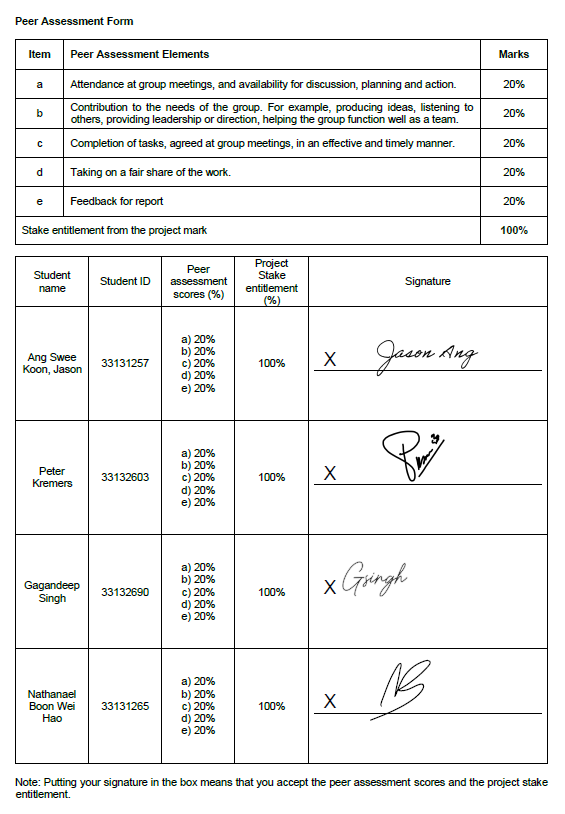

---
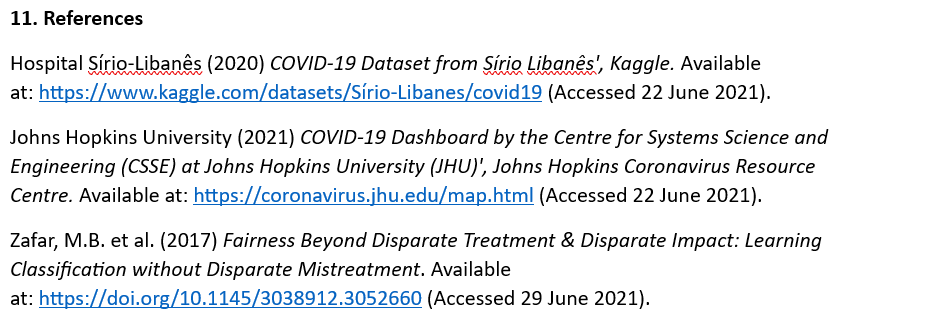